In [ ]:
# https://www.statista.com/statistics/1192394/cheese-export-volume-ireland/

In [219]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statistics as stat

#Mann-Whitney U test
import scipy.stats as stats

#import plotly for interactive graphs
import plotly.express as px 


# import to perform Shapiro-Wilk
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm

# import to perform Q Q plot
import statsmodels.api as sm

# import the libraries for LinearRegression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Libary for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

#Plot PACF function
from statsmodels.graphics.tsaplots import plot_pacf

#Libary for Autoregressive model
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# Calculate Skewness 
from scipy.stats import skew

#Libary for the Time Series Split Cross Validation Score algorithm
from sklearn.model_selection import cross_val_score

#libraries for Ridge Regression
from sklearn.linear_model import Ridge

#libraries for GridSearchCV
from sklearn.model_selection import GridSearchCV

#Libary for the Time Series Split Cross-Validation algorithm
from tsxv.splitTrain import split_train_variableInput

In [2]:
#Display option to see more columns. Usefull to see all the columns of Dummy variables for Machine Learning
pd.set_option('display.max_columns', 120)

#make the charts look better for displays with retina resolution 
%config InlineBackend.figure_format = 'retina'

In [3]:
#Read in milk collected annual data
df_MilkCollected_Annual = pd.read_csv('C:\\Project CA2\\Data\\milk products annual.csv')

#Read in file with Country, Alpha 2 and Alpha 3 codes
df_CountryCode = pd.read_csv('C:\\Project CA2\\Data\\ISO Codes.csv')

#Read in milk collected monthly data
df_MilkCollected_Monthly = pd.read_csv('C:\\Project CA2\\Data\\milk products monthly.csv')

### Annual Data
### Output is 4 files
### 1 file with  Raw Milk, Drinking Milk and Butter Produced Annualy for all EU countries from 1970
### 3 seperate files with country data for Ireland, Belgium and France from 1970

In [4]:
df_MilkCollected_Annual.head()

DATAFLOW        LAST UPDATE freq dairyprod   unit geo  \
0  ESTAT:APRO_MK_COLA(1.0)  30/11/22 23:00:00    A    D1110D  THS_T  AL   
1  ESTAT:APRO_MK_COLA(1.0)  30/11/22 23:00:00    A    D1110D  THS_T  AL   
2  ESTAT:APRO_MK_COLA(1.0)  30/11/22 23:00:00    A    D1110D  THS_T  AL   
3  ESTAT:APRO_MK_COLA(1.0)  30/11/22 23:00:00    A    D1110D  THS_T  AL   
4  ESTAT:APRO_MK_COLA(1.0)  30/11/22 23:00:00    A    D1110D  THS_T  AL   

   TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         2017      57.36        p  
1         2018      64.39      NaN  
2         2019      56.82      NaN  
3         2020      56.27      NaN  
4         2021      58.94      NaN

In [5]:
#Drop unwanted columns
#These columns have meta information that is constant or not useful 
df_MilkCollected_Annual.drop(['DATAFLOW', 'LAST UPDATE','freq','unit','OBS_FLAG'], axis=1,inplace=True)

In [6]:
df_MilkCollected_Annual.head()

dairyprod geo  TIME_PERIOD  OBS_VALUE
0    D1110D  AL         2017      57.36
1    D1110D  AL         2018      64.39
2    D1110D  AL         2019      56.82
3    D1110D  AL         2020      56.27
4    D1110D  AL         2021      58.94

In [7]:
#Rename colunms to something more meaningful 
df_MilkCollected_Annual = df_MilkCollected_Annual.rename(columns={'dairyprod': 'Product', 'geo': 'Geo', 'TIME_PERIOD': 'Year' ,'OBS_VALUE': 'Amount' }) 

In [8]:
#pivot into more useful format 
df_MilkCollected_Annual = df_MilkCollected_Annual.pivot_table(index = ['Year','Geo'], columns = ['Product'], values ='Amount')

In [9]:
df_MilkCollected_Annual.head()

Product     D1110D  D1200DME    D2100  D2200V  D3100_X_3113   D3113   D3200  \
Year Geo                                                                      
1968 BE    2909.55       NaN   579.00    6.80         19.13  121.08   36.36   
     DE   18318.09       NaN  3138.00  185.56         27.84  409.00  443.02   
     DK    4767.03       NaN      NaN   32.44           NaN     NaN     NaN   
     FR   19245.86       NaN  2370.18   44.14         52.19  692.48  190.71   
     IE        NaN       NaN      NaN     NaN           NaN     NaN     NaN   

Product   D4100   D6000   D7121  
Year Geo                         
1968 BE     NaN   76.21   31.81  
     DE     NaN  523.58  438.48  
     DK     NaN  159.55  105.50  
     FR     NaN  500.50  649.87  
     IE     NaN   73.25     NaN

In [10]:
#Delete years 1968 and 1970 as there is no data for Ireland for those years
df_MilkCollected_Annual = df_MilkCollected_Annual.drop([1968, 1969])

In [11]:
#Reset the index
df_MilkCollected_Annual = df_MilkCollected_Annual.reset_index( )

In [12]:
#Merge country codes with the milk collected dataframe
#Now the milk collected dataframe has ISO 3 country code for choropleth and country name
df_MilkCollected_Annual = pd.merge(df_CountryCode,df_MilkCollected_Annual,on='Geo')

In [13]:
#Drop unwanted columns
#Dropping columns that are NOT Milk Deliveries, Drinking Milk, Cream and Butter produced
df_MilkCollected_Annual.drop(['D1200DME','D3100_X_3113','D3113','D3200','D4100','D7121'], axis=1,inplace=True)

In [14]:
#Rename product columns to something more meaningful 
df_MilkCollected_Annual = df_MilkCollected_Annual.rename(columns={'D1110D': 'Raw Milk Deliveries', 'D2100': 'Milk', 'D2200V': 'Cream' ,'D6000': 'Butter' }) 

In [15]:
df_MilkCollected_Annual_Ireland = df_MilkCollected_Annual.query("Country=='Ireland'")
df_MilkCollected_Annual_Belgium = df_MilkCollected_Annual.query("Country=='Belgium'")
df_MilkCollected_Annual_France = df_MilkCollected_Annual.query("Country=='France'")

In [16]:
df_MilkCollected_Annual_Ireland.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
dtype: int64

In [17]:
df_MilkCollected_Annual_Belgium.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
dtype: int64

In [18]:
df_MilkCollected_Annual_France.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
dtype: int64

In [19]:
df_MilkCollected_Annual.head()

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter
0  Albania  AL  ALB  2017                57.36   8.93   0.21    1.65
1  Albania  AL  ALB  2018                64.39  13.47   0.46    2.63
2  Albania  AL  ALB  2019                56.82  10.15   0.23    0.42
3  Albania  AL  ALB  2020                56.27  14.48   0.29    0.51
4  Albania  AL  ALB  2021                58.94  12.19   0.29    0.63

### Monthly Data
### Output is 2 files 
### 1. Irish Monthly data from 1970 for Raw Milk, Drinking Milk and Butter Produced 
### 2. Belgium Monthly data from 1970 for Raw Milk, Drinking Milk and Butter Produced 
### Will be input to machine learning

In [20]:
df_MilkCollected_Monthly.head()

DATAFLOW        LAST UPDATE freq dairyprod    unit geo  \
0  ESTAT:APRO_MK_COLM(1.0)  02/12/22 23:00:00    M    D1110D  PC_FAT  AL   
1  ESTAT:APRO_MK_COLM(1.0)  02/12/22 23:00:00    M    D1110D  PC_FAT  AL   
2  ESTAT:APRO_MK_COLM(1.0)  02/12/22 23:00:00    M    D1110D  PC_FAT  AL   
3  ESTAT:APRO_MK_COLM(1.0)  02/12/22 23:00:00    M    D1110D  PC_FAT  AL   
4  ESTAT:APRO_MK_COLM(1.0)  02/12/22 23:00:00    M    D1110D  PC_FAT  AL   

  TIME_PERIOD  OBS_VALUE OBS_FLAG  
0     2015-01        0.0      NaN  
1     2015-02        0.0      NaN  
2     2015-03        0.0      NaN  
3     2015-04        0.0      NaN  
4     2015-05        0.0      NaN

In [21]:
#unit column can have 3 values per thousand tons, fat content and protein content
#only column I am interested in is per thousand tons (THS_T)
df_MilkCollected_Monthly = df_MilkCollected_Monthly.query("unit=='THS_T'")

In [22]:
#Drop unwanted columns
#These columns have meta information that is constant or not useful 
df_MilkCollected_Monthly.drop(['DATAFLOW', 'LAST UPDATE','freq','OBS_FLAG','unit'], axis=1,inplace=True)

In [23]:
df_MilkCollected_Monthly.head()

dairyprod geo TIME_PERIOD  OBS_VALUE
26134    D1110D  AL     2015-01        0.0
26135    D1110D  AL     2015-02        0.0
26136    D1110D  AL     2015-03        0.0
26137    D1110D  AL     2015-04        0.0
26138    D1110D  AL     2015-05        0.0

In [24]:
#Rename colunms to something more meaningful 
df_MilkCollected_Monthly = df_MilkCollected_Monthly.rename(columns={'dairyprod': 'Product', 'geo': 'Geo', 'TIME_PERIOD': 'Year' ,'OBS_VALUE': 'Amount' }) 

In [25]:
#pivot into more useful format 
df_MilkCollected_Monthly  = df_MilkCollected_Monthly.pivot_table(index = ['Year','Geo'], columns = ['Product'], values ='Amount')


In [26]:
df_MilkCollected_Monthly.head()

Product       D1110D  D1200DME   D2100  D2200V  D3100_X_3113  D3113  D3200  \
Year    Geo                                                                  
1968-01 BE    158.26       NaN   49.00    0.44          1.06   3.82   3.19   
        DE   1379.20       NaN  251.00   11.24          1.71  28.13  37.64   
        DK    341.96       NaN     NaN    2.58           NaN    NaN    NaN   
        FR   1268.60       NaN  221.36    3.01          3.19  39.92  12.41   
        IE       NaN       NaN     NaN     NaN           NaN    NaN    NaN   

Product      D4100  D6000  D7121  
Year    Geo                       
1968-01 BE     NaN   3.26   2.91  
        DE     NaN  41.09  33.96  
        DK     NaN  11.38   8.78  
        FR     NaN  30.97  48.23  
        IE     NaN   1.16    NaN

In [27]:
#Reset the index
df_MilkCollected_Monthly = df_MilkCollected_Monthly.reset_index( )

In [28]:
#Merge country codes with the milk collected dataframe
#Now the milk collected dataframe has ISO 3 country code for choropleth and country name
df_MilkCollected_Monthly = pd.merge(df_CountryCode,df_MilkCollected_Monthly,on='Geo')

In [29]:
df_MilkCollected_Monthly.head()

Country Geo Code     Year  D1110D  D1200DME  D2100  D2200V  D3100_X_3113  \
0  Albania  AL  ALB  2015-01     0.0       NaN    0.0     0.0           0.0   
1  Albania  AL  ALB  2015-02     0.0       NaN    0.0     0.0           0.0   
2  Albania  AL  ALB  2015-03     0.0       NaN    0.0     0.0           0.0   
3  Albania  AL  ALB  2015-04     0.0       NaN    0.0     0.0           0.0   
4  Albania  AL  ALB  2015-05     0.0       NaN    0.0     0.0           0.0   

   D3113  D3200  D4100  D6000  D7121  
0    0.0    0.0    0.0    NaN    NaN  
1    0.0    0.0    0.0    NaN    NaN  
2    0.0    0.0    0.0    NaN    NaN  
3    0.0    0.0    0.0    NaN    NaN  
4    0.0    0.0    0.0    NaN    NaN

In [30]:
df_MilkCollected_Monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12169 entries, 0 to 12168
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       12169 non-null  object 
 1   Geo           12169 non-null  object 
 2   Code          12169 non-null  object 
 3   Year          12169 non-null  object 
 4   D1110D        12083 non-null  float64
 5   D1200DME      4134 non-null   float64
 6   D2100         11282 non-null  float64
 7   D2200V        11246 non-null  float64
 8   D3100_X_3113  10432 non-null  float64
 9   D3113         10395 non-null  float64
 10  D3200         9481 non-null   float64
 11  D4100         7772 non-null   float64
 12  D6000         11641 non-null  float64
 13  D7121         11560 non-null  float64
dtypes: float64(10), object(4)
memory usage: 1.4+ MB


In [31]:
#Date conversion section

#Convert Year column to a datetime objest
df_MilkCollected_Monthly['Year'] = pd.to_datetime(df_MilkCollected_Monthly['Year'])

#Add a month value to the dataframe
df_MilkCollected_Monthly['Month'] = df_MilkCollected_Monthly['Year'].dt.month

#Add a month value to the dataframe
df_MilkCollected_Monthly['Year Month'] = df_MilkCollected_Monthly['Year']

#Add a year value to the dataframe (Was in format yyyy-mm)
df_MilkCollected_Monthly['Year'] = df_MilkCollected_Monthly['Year'].dt.year


In [32]:
df_MilkCollected_Monthly.head()

Country Geo Code  Year  D1110D  D1200DME  D2100  D2200V  D3100_X_3113  \
0  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
1  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
2  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
3  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
4  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   

   D3113  D3200  D4100  D6000  D7121  Month Year Month  
0    0.0    0.0    0.0    NaN    NaN      1 2015-01-01  
1    0.0    0.0    0.0    NaN    NaN      2 2015-02-01  
2    0.0    0.0    0.0    NaN    NaN      3 2015-03-01  
3    0.0    0.0    0.0    NaN    NaN      4 2015-04-01  
4    0.0    0.0    0.0    NaN    NaN      5 2015-05-01

In [33]:
df_MilkCollected_Monthly.head()

Country Geo Code  Year  D1110D  D1200DME  D2100  D2200V  D3100_X_3113  \
0  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
1  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
2  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
3  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
4  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   

   D3113  D3200  D4100  D6000  D7121  Month Year Month  
0    0.0    0.0    0.0    NaN    NaN      1 2015-01-01  
1    0.0    0.0    0.0    NaN    NaN      2 2015-02-01  
2    0.0    0.0    0.0    NaN    NaN      3 2015-03-01  
3    0.0    0.0    0.0    NaN    NaN      4 2015-04-01  
4    0.0    0.0    0.0    NaN    NaN      5 2015-05-01

In [34]:
#Drop unwanted columns
#Dropping columns that are NOT Milk Deliveries, Drinking Milk, Cream and Butter produced
df_MilkCollected_Monthly.drop(['D1200DME','D3100_X_3113','D3113','D3200','D4100','D7121'], axis=1,inplace=True)

In [35]:
#Rename product columns to something more meaningful 
df_MilkCollected_Monthly = df_MilkCollected_Monthly.rename(columns={'D1110D': 'Raw Milk Deliveries', 'D2100': 'Milk', 'D2200V': 'Cream' ,'D6000': 'Butter' }) 

In [36]:
df_MilkCollected_Monthly.head()

Country Geo Code  Year  Raw Milk Deliveries  Milk  Cream  Butter  Month  \
0  Albania  AL  ALB  2015                  0.0   0.0    0.0     NaN      1   
1  Albania  AL  ALB  2015                  0.0   0.0    0.0     NaN      2   
2  Albania  AL  ALB  2015                  0.0   0.0    0.0     NaN      3   
3  Albania  AL  ALB  2015                  0.0   0.0    0.0     NaN      4   
4  Albania  AL  ALB  2015                  0.0   0.0    0.0     NaN      5   

  Year Month  
0 2015-01-01  
1 2015-02-01  
2 2015-03-01  
3 2015-04-01  
4 2015-05-01

In [37]:
df_MilkCollected_Monthly_Ireland = df_MilkCollected_Monthly.query("Country=='Ireland'")
df_MilkCollected_Monthly_Ireland = df_MilkCollected_Monthly_Ireland.query("Year > 1969")

df_MilkCollected_Monthly_Belgium = df_MilkCollected_Monthly.query("Country=='Belgium'")
df_MilkCollected_Monthly_Belgium = df_MilkCollected_Monthly_Belgium.query("Year > 1969")

In [38]:
df_MilkCollected_Monthly_Ireland.head()

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter  \
5251  Ireland  IE  IRL  1970                63.74  33.86   0.21    1.01   
5252  Ireland  IE  IRL  1970                76.61  31.77   0.24    1.29   
5253  Ireland  IE  IRL  1970               149.14  34.43   0.32    3.04   
5254  Ireland  IE  IRL  1970               232.22  33.74   0.32    5.28   
5255  Ireland  IE  IRL  1970               366.30  35.30   0.41   10.03   

      Month Year Month  
5251      1 1970-01-01  
5252      2 1970-02-01  
5253      3 1970-03-01  
5254      4 1970-04-01  
5255      5 1970-05-01

In [39]:
df_MilkCollected_Monthly_Belgium.head()

Country Geo Code  Year  Raw Milk Deliveries  Milk  Cream  Butter  Month  \
438  Belgium  BE  BEL  1970               146.60  49.0   0.51    3.26      1   
439  Belgium  BE  BEL  1970               148.24  46.0   0.54    3.17      2   
440  Belgium  BE  BEL  1970               201.78  50.0   0.66    4.64      3   
441  Belgium  BE  BEL  1970               221.69  52.0   0.70    5.51      4   
442  Belgium  BE  BEL  1970               293.80  48.0   0.80    7.90      5   

    Year Month  
438 1970-01-01  
439 1970-02-01  
440 1970-03-01  
441 1970-04-01  
442 1970-05-01

In [40]:
df_MilkPrices_Monthly = pd.read_csv('C:\\Project CA2\\Data\\Raw Milk Selling Prices.csv')

In [41]:
df_MilkPrices_Monthly.head()

Year  Ireland  Belgium  France   Year2
0  1977m01    14.62    18.57   16.76  Jan-77
1  1977m02    15.05    18.13   16.55  Feb-77
2  1977m03    14.12    16.79   16.34  Mar-77
3  1977m04    14.19    16.95   15.97  Apr-77
4  1977m05    14.61    17.32   15.15  May-77

In [42]:
#Drop unwanted year column
df_MilkPrices_Monthly.drop(['Year2','France'], axis=1,inplace=True)

#String replace so Year can be converted to datetime object
df_MilkPrices_Monthly['Year'] = df_MilkPrices_Monthly['Year'].str.replace('m', '-')

#Convert Year column to a datetime objest
df_MilkPrices_Monthly['Year'] = pd.to_datetime(df_MilkPrices_Monthly['Year'])

#Add a month value to the dataframe
df_MilkPrices_Monthly['Year Month'] = df_MilkPrices_Monthly['Year']

#Drop unwanted Year column
df_MilkPrices_Monthly.drop(['Year'], axis=1,inplace=True)


In [43]:
df_MilkPrices_Monthly_Ireland = df_MilkPrices_Monthly
df_MilkPrices_Monthly_Belgium = df_MilkPrices_Monthly

In [44]:
df_MilkPrices_Monthly_Ireland = df_MilkPrices_Monthly_Ireland.rename(columns={'Ireland': 'Milk Selling Price'}) 
df_MilkPrices_Monthly_Belgium = df_MilkPrices_Monthly_Belgium.rename(columns={'Belgium': 'Milk Selling Price'}) 

df_MilkPrices_Monthly_Ireland.drop(['Belgium'], axis=1,inplace=True)
df_MilkPrices_Monthly_Belgium.drop(['Ireland'], axis=1,inplace=True)



In [45]:
df_MilkPrices_Monthly_Ireland.head()

Milk Selling Price Year Month
0               14.62 1977-01-01
1               15.05 1977-02-01
2               14.12 1977-03-01
3               14.19 1977-04-01
4               14.61 1977-05-01

In [46]:
df_MilkPrices_Monthly_Belgium.head()

Milk Selling Price Year Month
0               18.57 1977-01-01
1               18.13 1977-02-01
2               16.79 1977-03-01
3               16.95 1977-04-01
4               17.32 1977-05-01

In [47]:
df_Milk_Monthly_Ireland = df_MilkCollected_Monthly_Ireland.query("Year > 1976")
df_Milk_Monthly_Belgium= df_MilkCollected_Monthly_Belgium.query("Year > 1976")

In [48]:
df_Milk_Monthly_Ireland.reset_index(drop=True, inplace=True)
df_Milk_Monthly_Belgium.reset_index(drop=True, inplace=True)

In [49]:
df_Milk_Monthly_Ireland.shape

(550, 10)

In [50]:
df_MilkPrices_Monthly_Belgium.shape

(551, 2)

In [51]:
#Drop last rows as they contain nulls
df_MilkPrices_Monthly_Ireland = df_MilkPrices_Monthly_Ireland.drop(df_MilkPrices_Monthly_Ireland.index[-1])
df_MilkPrices_Belgium_Ireland = df_MilkPrices_Monthly_Belgium.drop(df_MilkPrices_Monthly_Belgium.index[-1])

In [52]:
df_Milk_Monthly_Ireland_77  = pd.concat([df_Milk_Monthly_Ireland, df_MilkPrices_Monthly_Ireland],axis=1)
df_Milk_Monthly_Belgium_77  = pd.concat([df_Milk_Monthly_Belgium, df_MilkPrices_Monthly_Belgium],axis=1)

In [53]:
df_Milk_Monthly_Ireland_77.shape

(550, 12)

In [54]:
#Get rid of the duplicate Date and Time column
df_Milk_Monthly_Belgium_77 = df_Milk_Monthly_Belgium_77.loc[:,~df_Milk_Monthly_Belgium_77.columns.duplicated()].copy()
df_Milk_Monthly_Ireland_77 = df_Milk_Monthly_Ireland_77.loc[:,~df_Milk_Monthly_Ireland_77.columns.duplicated()].copy()

In [55]:
df_Milk_Monthly_Ireland_77.tail()

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter  Month  \
545  Ireland  IE  IRL  2022              1089.03  44.34   2.82   29.09      6   
546  Ireland  IE  IRL  2022              1053.16  43.81   3.28   29.26      7   
547  Ireland  IE  IRL  2022               946.30  44.43   3.12   28.60      8   
548  Ireland  IE  IRL  2022               808.95  42.69   2.47   23.68      9   
549  Ireland  IE  IRL  2022               719.23  42.79   2.93   21.57     10   

    Year Month  Milk Selling Price  
545 2022-06-01               55.45  
546 2022-07-01               57.78  
547 2022-08-01               59.73  
548 2022-09-01               64.29  
549 2022-10-01               68.47

In [56]:
df_Milk_Monthly_Ireland_77.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Country              550 non-null    object        
 1   Geo                  550 non-null    object        
 2   Code                 550 non-null    object        
 3   Year                 550 non-null    int64         
 4   Raw Milk Deliveries  550 non-null    float64       
 5   Milk                 550 non-null    float64       
 6   Cream                550 non-null    float64       
 7   Butter               550 non-null    float64       
 8   Month                550 non-null    int64         
 9   Year Month           550 non-null    datetime64[ns]
 10  Milk Selling Price   550 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 47.4+ KB


In [57]:

df_Milk_Monthly_Ireland_77['Month'] = df_Milk_Monthly_Ireland_77['Month'].astype(int)

### Basic data prep finished

### Begin data exploration and charting

In [58]:
#Check for Null values in Ireland monthly dataset 
df_MilkCollected_Monthly_Ireland.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
Month                  0
Year Month             0
dtype: int64

In [59]:
#Check for Null values in Brlgium monthly dataset 
df_MilkCollected_Monthly_Belgium.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
Month                  0
Year Month             0
dtype: int64

In [60]:
#Check for duplicate Rows in df_MilkCollected_Annual
df_MilkCollected_Annual[df_MilkCollected_Annual.duplicated()] 

Empty DataFrame
Columns: [Country, Geo, Code, Year, Raw Milk Deliveries, Milk, Cream, Butter]
Index: []

In [61]:
#Check for duplicate Rows in df_MilkCollected_Monthly for Ireland
df_MilkCollected_Monthly_Ireland[df_MilkCollected_Monthly_Ireland.duplicated()] 

Empty DataFrame
Columns: [Country, Geo, Code, Year, Raw Milk Deliveries, Milk, Cream, Butter, Month, Year Month]
Index: []

In [62]:
#Check for duplicate Rows in df_MilkCollected_Monthly for Belgium
df_MilkCollected_Monthly_Belgium[df_MilkCollected_Monthly_Belgium.duplicated()] 

Empty DataFrame
Columns: [Country, Geo, Code, Year, Raw Milk Deliveries, Milk, Cream, Butter, Month, Year Month]
Index: []

In [63]:
#Chart showing EU butter production for 1970 to 2021

#x = df_MilkCollected_Annual.query("Year==2019")
df_map = df_MilkCollected_Annual
df_map.sort_values(by=["Year"],inplace=True) 


fig = px.choropleth(df_map, 
 locations="Code", # colunm containing ISO 3166 country codes 
 color="Butter",                 
 hover_name="Country", # column to display in hover information 
 animation_frame="Year", # column on which to animate                  
 color_continuous_scale=px.colors.sequential.YlGnBu) 

fig.update_layout( 
 # add a title text for the plot 
 title_text = 'Butter Produced - 2019 in Thousand Tons', 
 geo_scope = 'europe' # can be set to north america | south america | africa | asia | europe | usa 
) 

fig.show() 



<AxesSubplot:xlabel='Raw Milk Deliveries'>

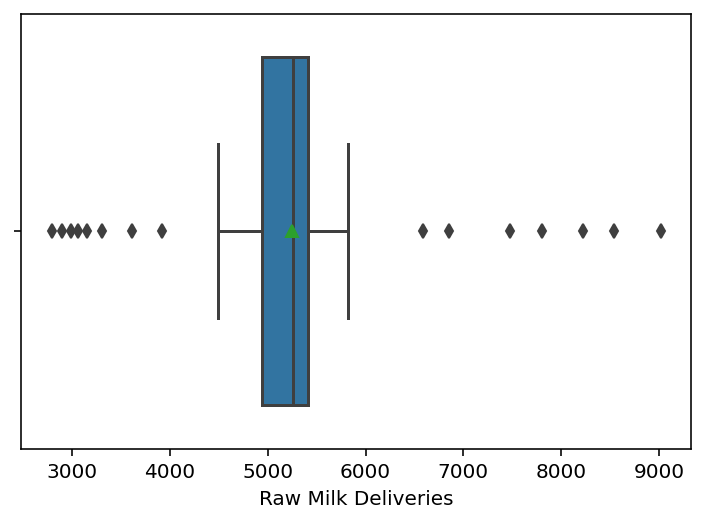

In [64]:
#Boxplot Raw Milk Deliveries Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'],showmeans=True) 

<AxesSubplot:xlabel='Milk'>

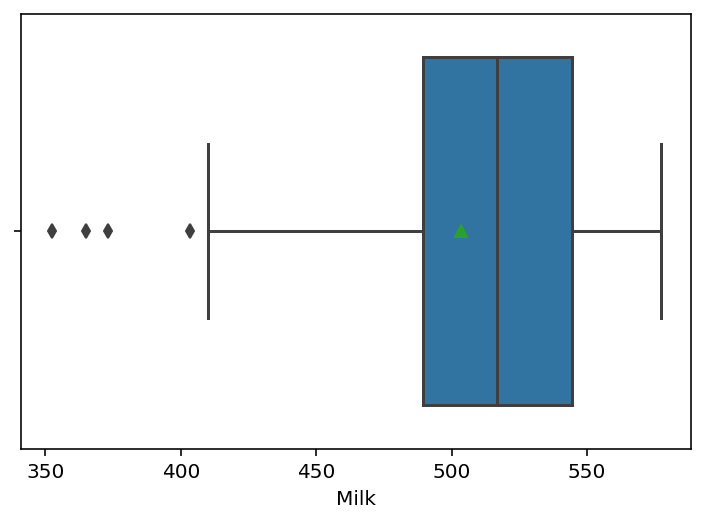

In [65]:
#Boxplot Milk  produced Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Milk'],showmeans=True) 

<AxesSubplot:xlabel='Cream'>

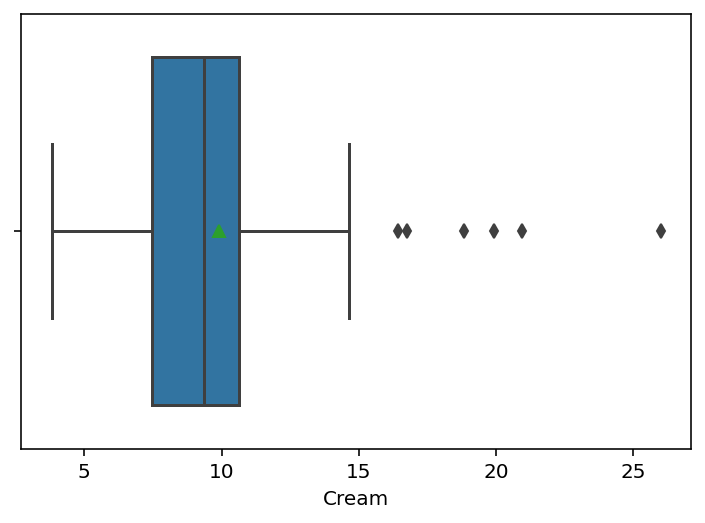

In [66]:
#Boxplot Cream produced Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Cream'],showmeans=True) 

<AxesSubplot:xlabel='Butter'>

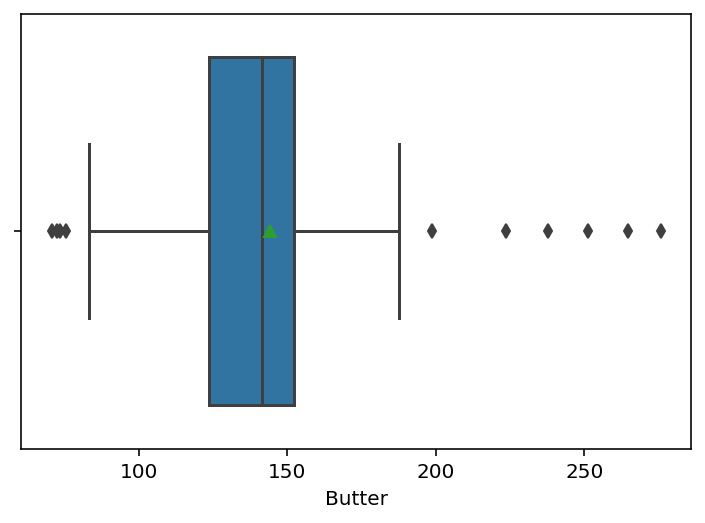

In [67]:
#Boxplot Butter produced Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Butter'],showmeans=True) 

Year  Raw Milk Deliveries      Milk     Cream  \
Year                 1.000000             0.818833  0.703861  0.847289   
Raw Milk Deliveries  0.818833             1.000000  0.681050  0.911173   
Milk                 0.703861             0.681050  1.000000  0.532384   
Cream                0.847289             0.911173  0.532384  1.000000   
Butter               0.787330             0.987283  0.639956  0.914487   

                       Butter  
Year                 0.787330  
Raw Milk Deliveries  0.987283  
Milk                 0.639956  
Cream                0.914487  
Butter               1.000000

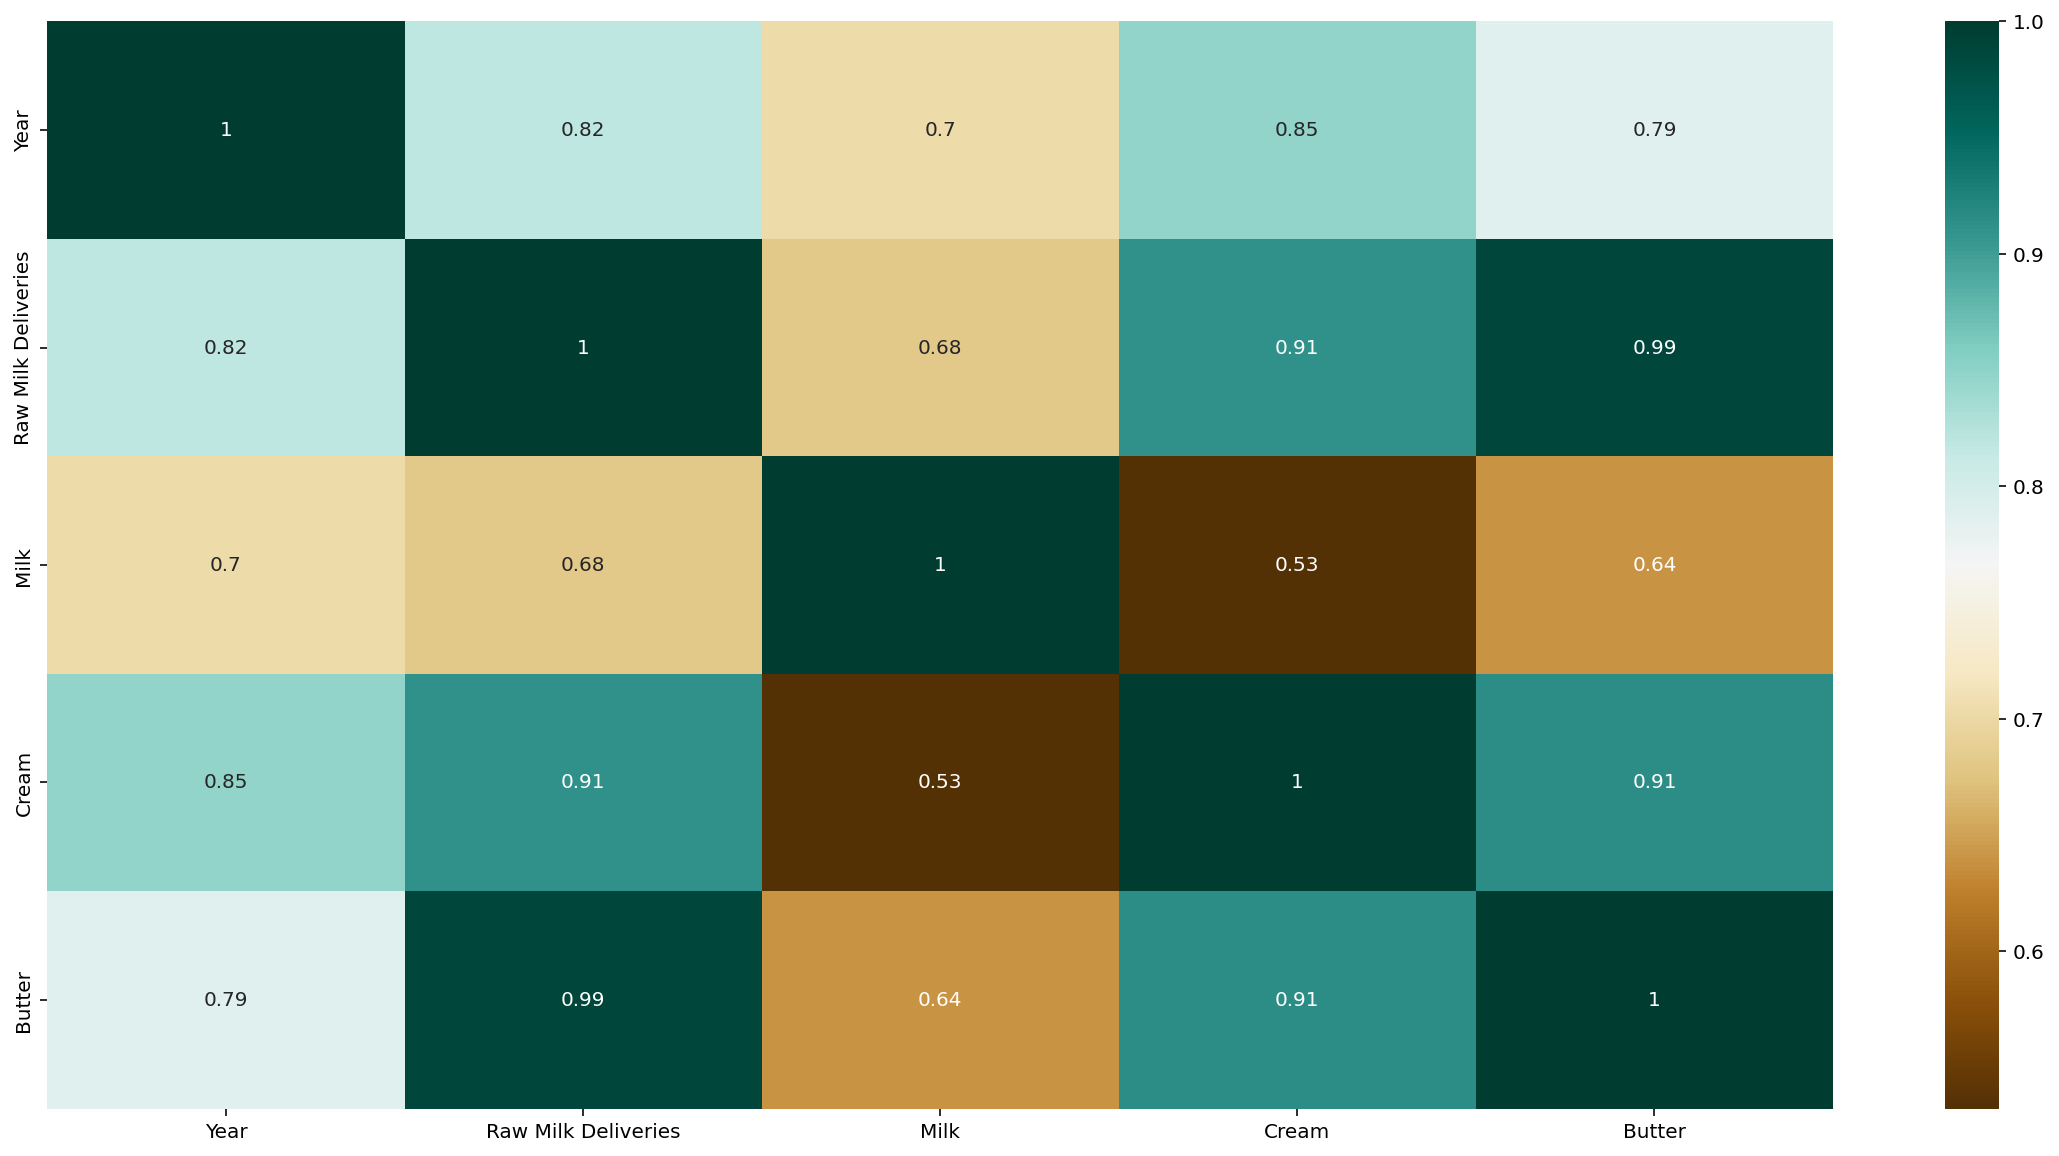

In [68]:
#Create heatmap for Irish Annual data
plt.figure(figsize=(20,10))
c= df_MilkCollected_Annual_Ireland.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c 

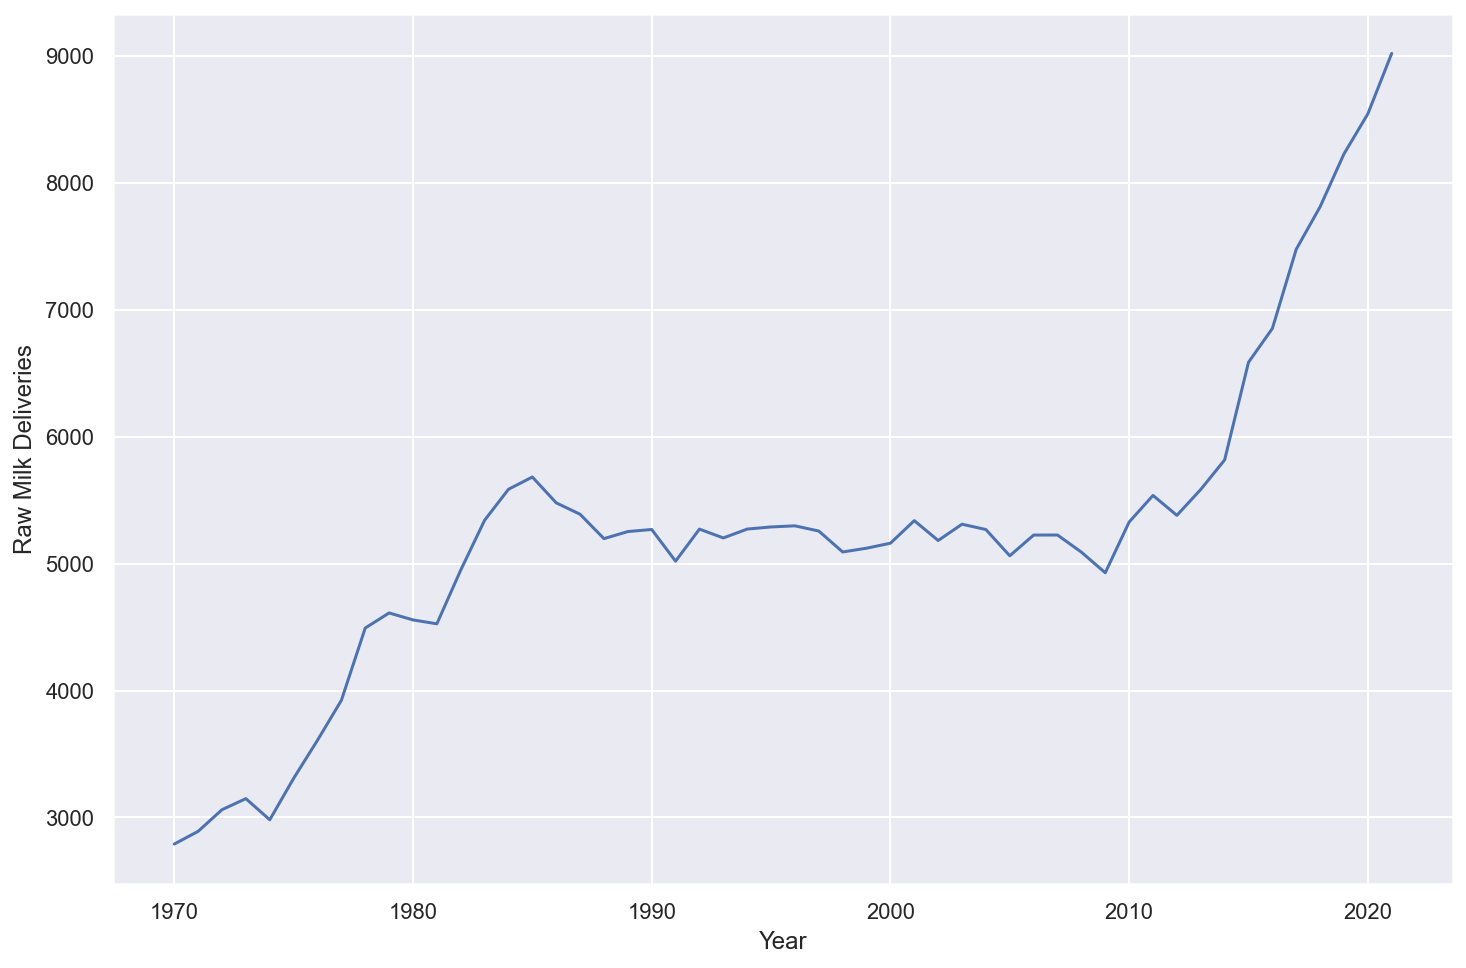

In [69]:
#Graph of Yearly Raw Milk Collected for Ireland

sns.set(rc = {'figure.figsize':(12,8)})
sns.set(font_scale=1)
myfig = sns.lineplot(x = 'Year', y = 'Raw Milk Deliveries', data = df_MilkCollected_Annual_Ireland)
plt.show()

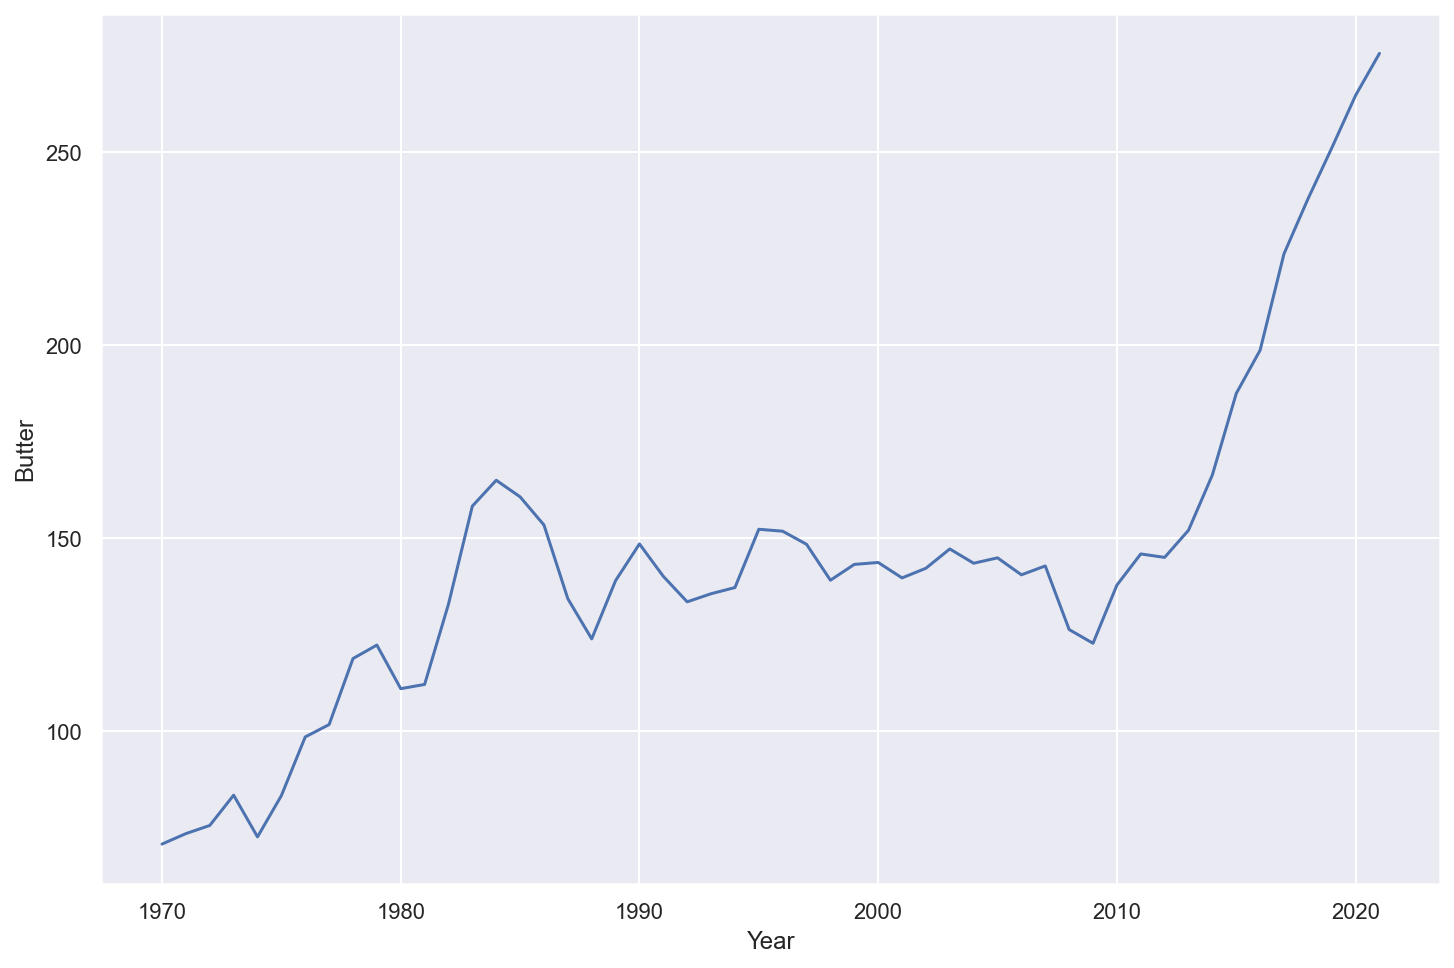

In [70]:
#Graph of Yearly Butter produced Ireland

sns.set(rc = {'figure.figsize':(12,8)})
sns.set(font_scale=1)
myfig = sns.lineplot(x = 'Year', y = 'Butter', data = df_MilkCollected_Annual_Ireland)
plt.show()

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Thousand Tons')]

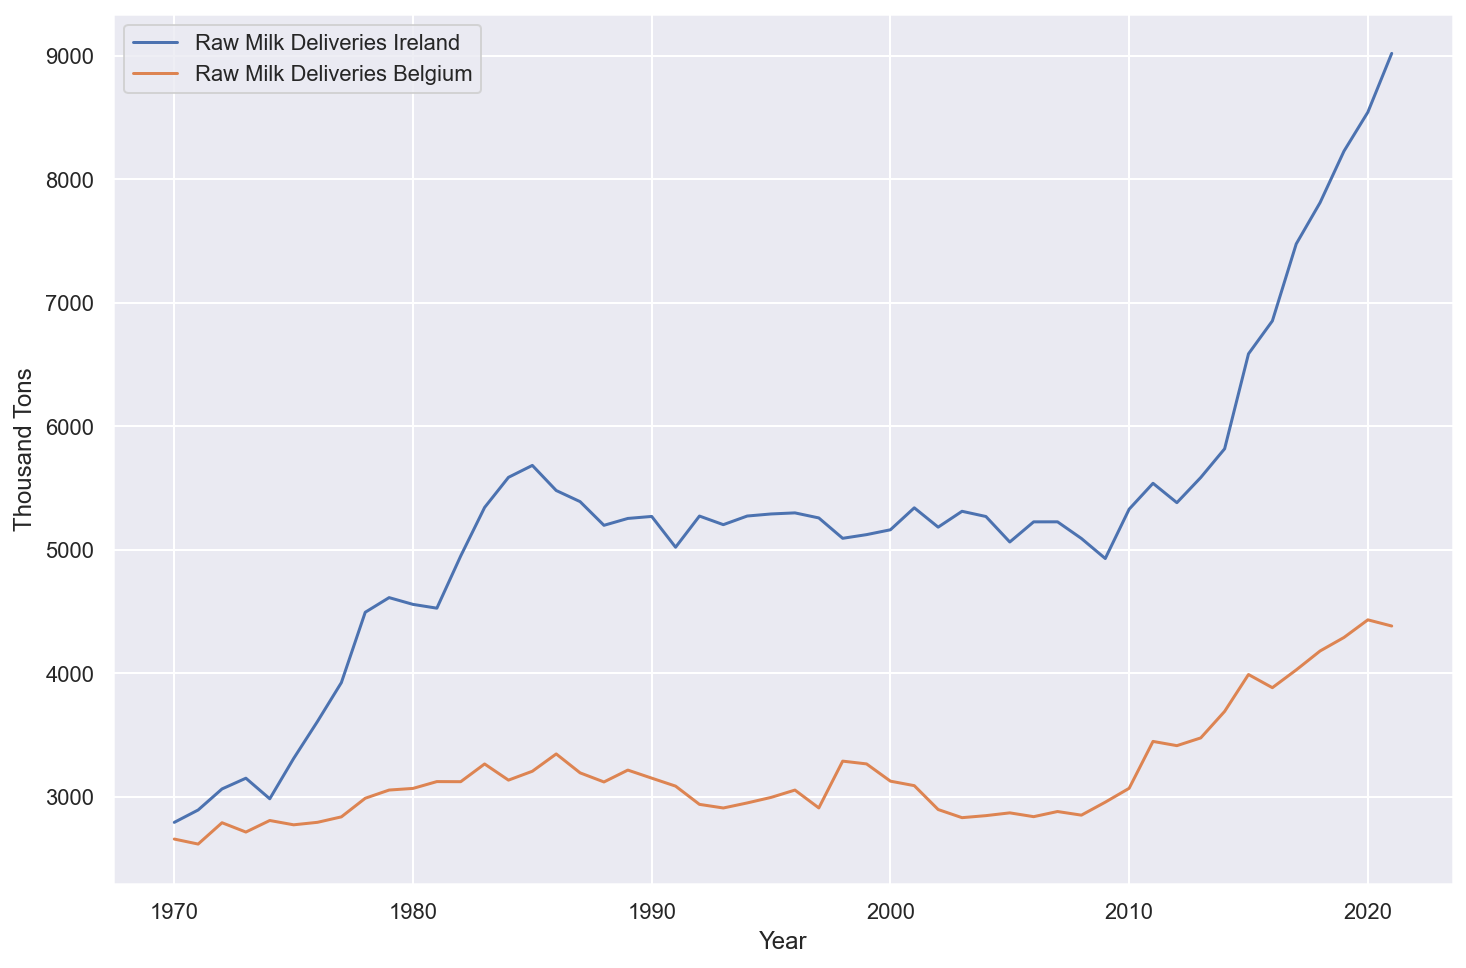

In [71]:
#Plot comparing Raw Milk deliveries Ireland vs Belgium

fig, ax = plt.subplots()
sns.set(font_scale=1)
sns.set(rc = {'figure.figsize':(10,8)})
ax= sns.lineplot(x='Year', y='Raw Milk Deliveries', label="Raw Milk Deliveries Ireland", data=df_MilkCollected_Annual_Ireland)
ax1 = sns.lineplot(x='Year', y='Raw Milk Deliveries', label="Raw Milk Deliveries Belgium", data=df_MilkCollected_Annual_Belgium)
ax.set( xlabel = "Year", ylabel = "Thousand Tons")

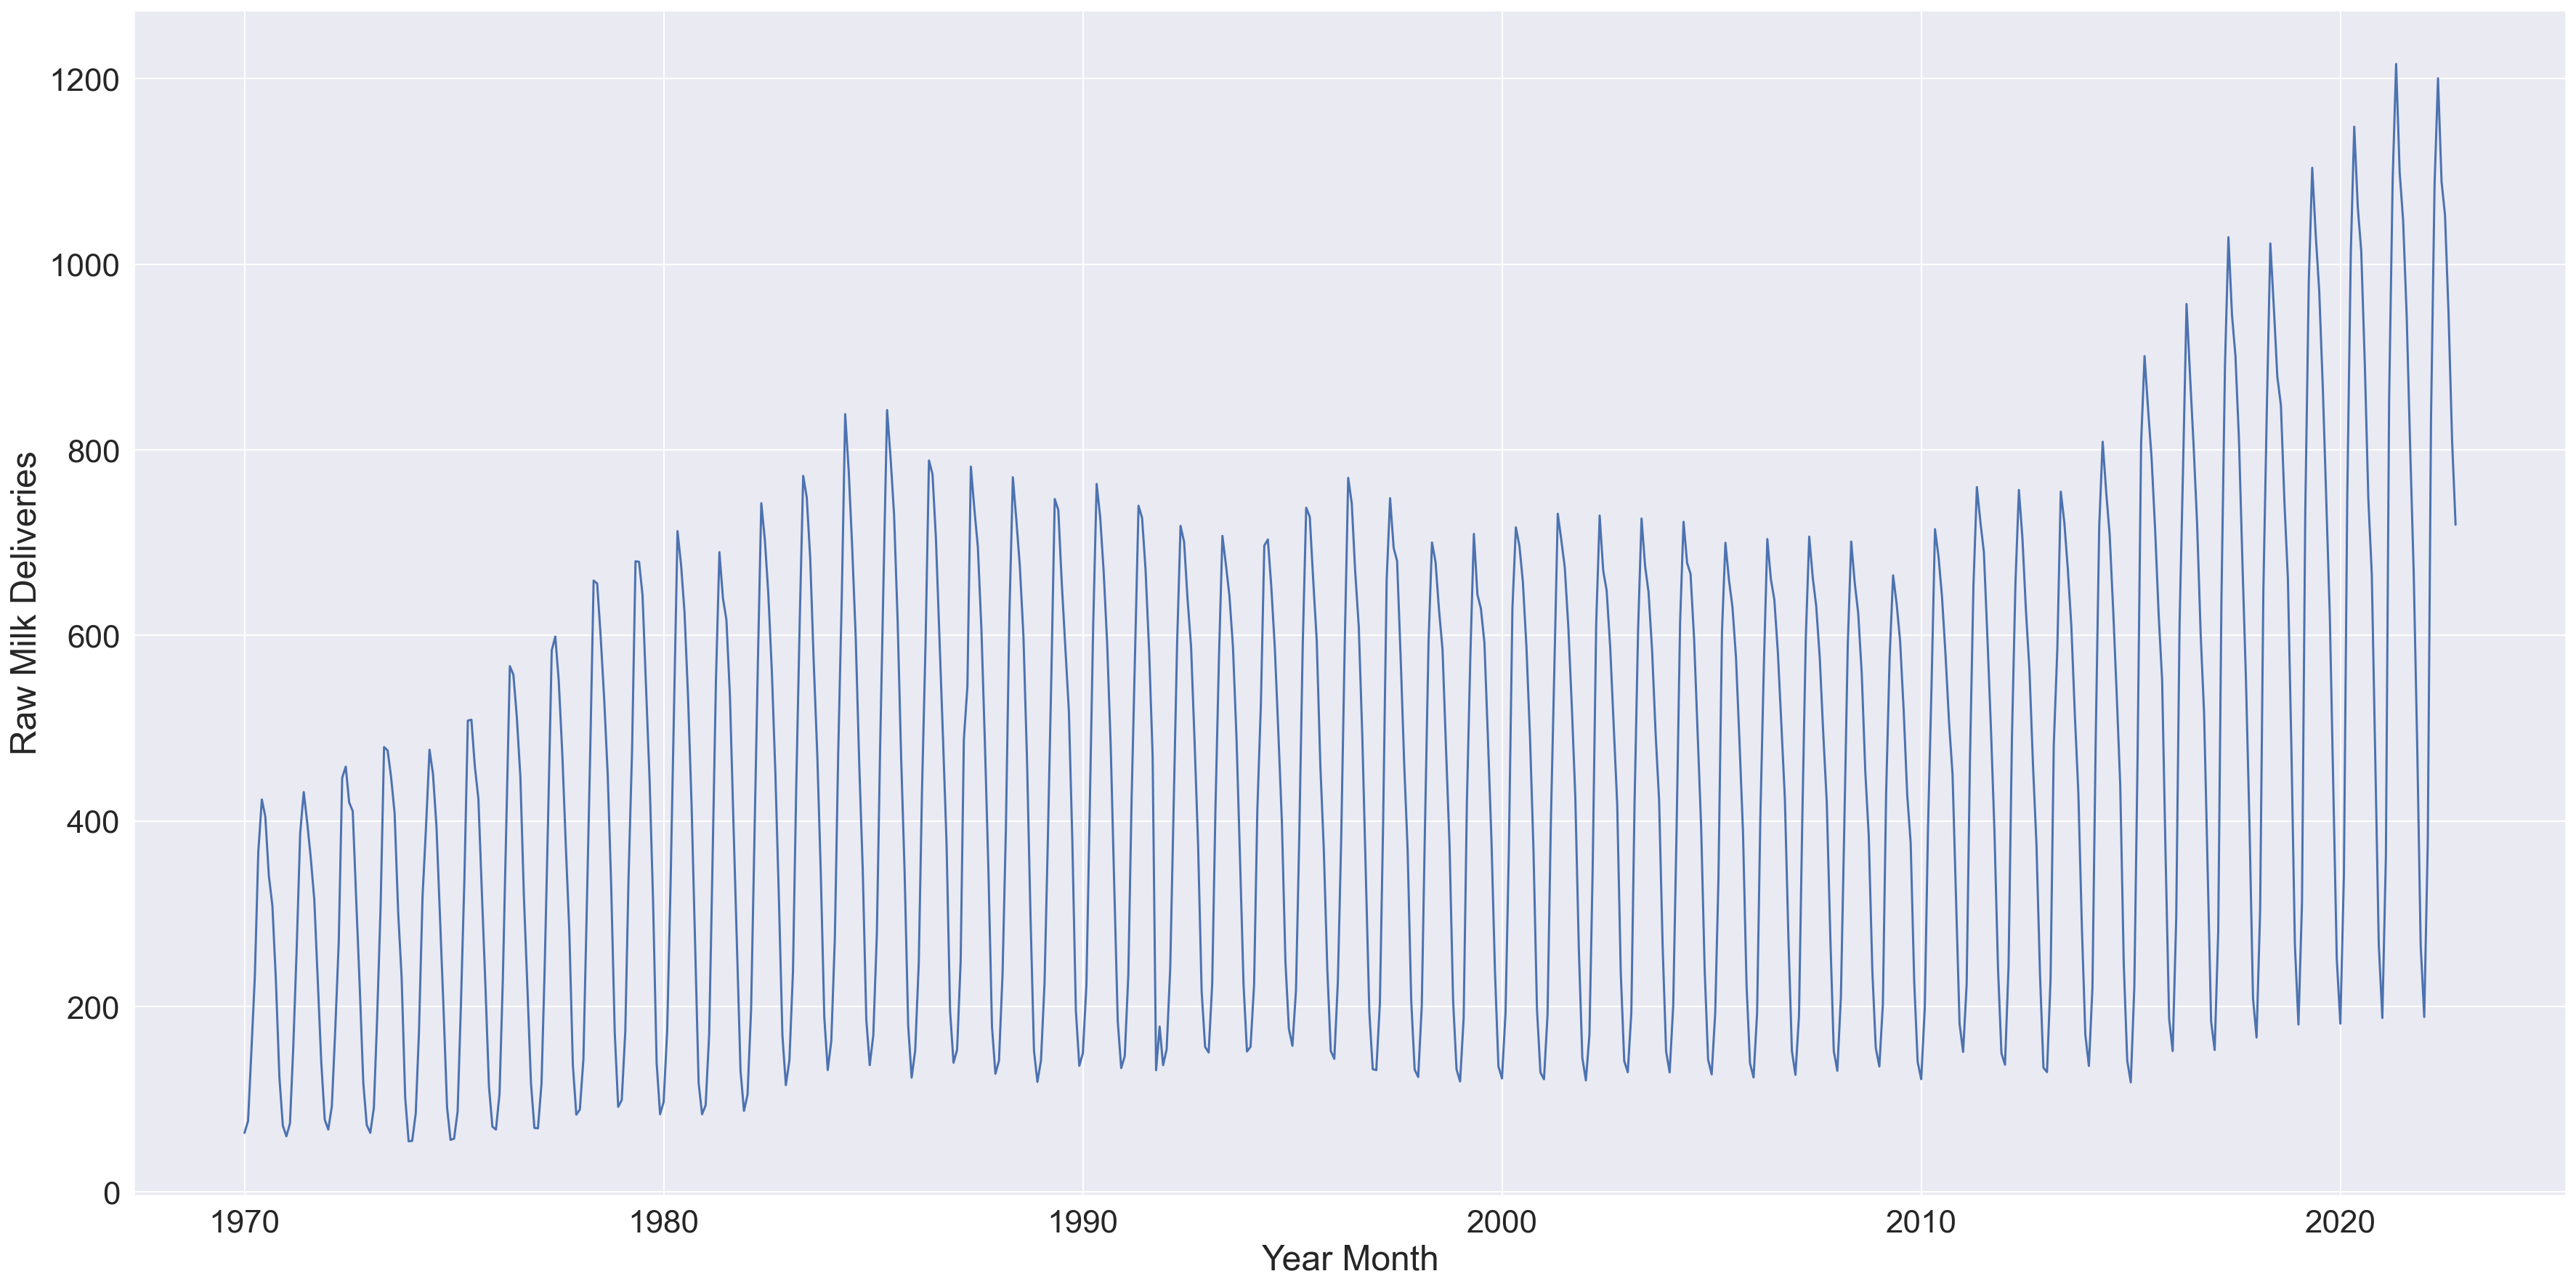

In [72]:
#Plot of Raw Milk collected monthly data Ireland

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Raw Milk Deliveries', data = df_MilkCollected_Monthly_Ireland)
plt.show()

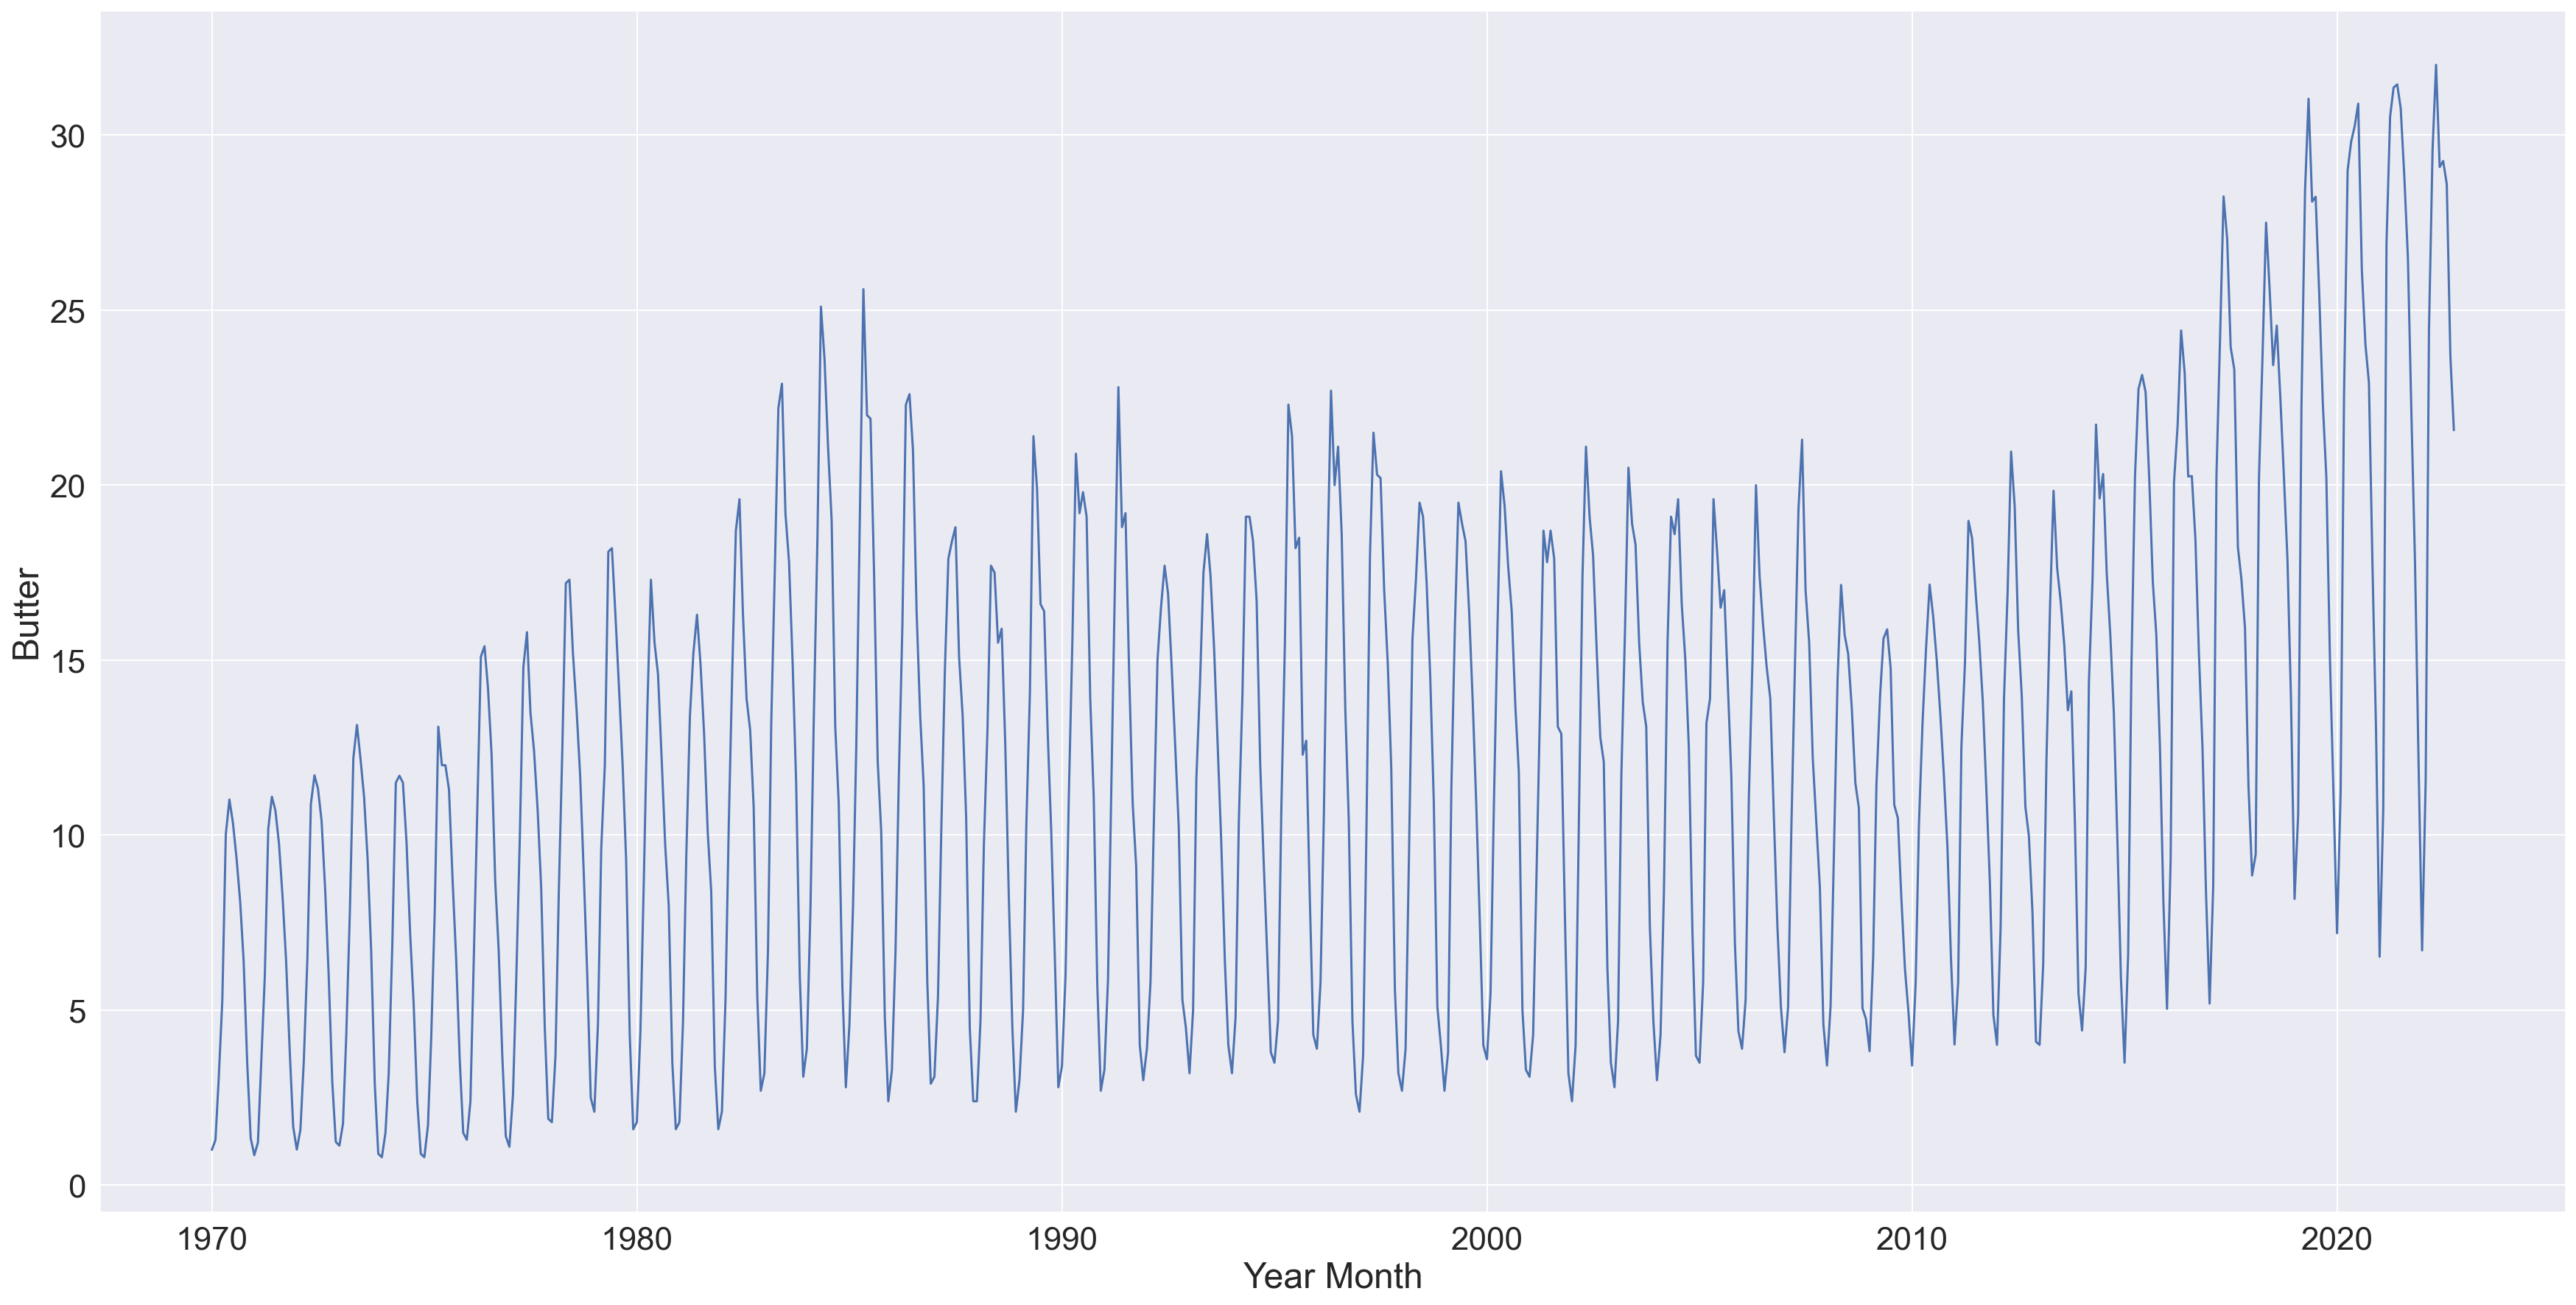

In [73]:
#Plot of Butter produced monthly data Ireland

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Butter', data = df_MilkCollected_Monthly_Ireland)
plt.show()

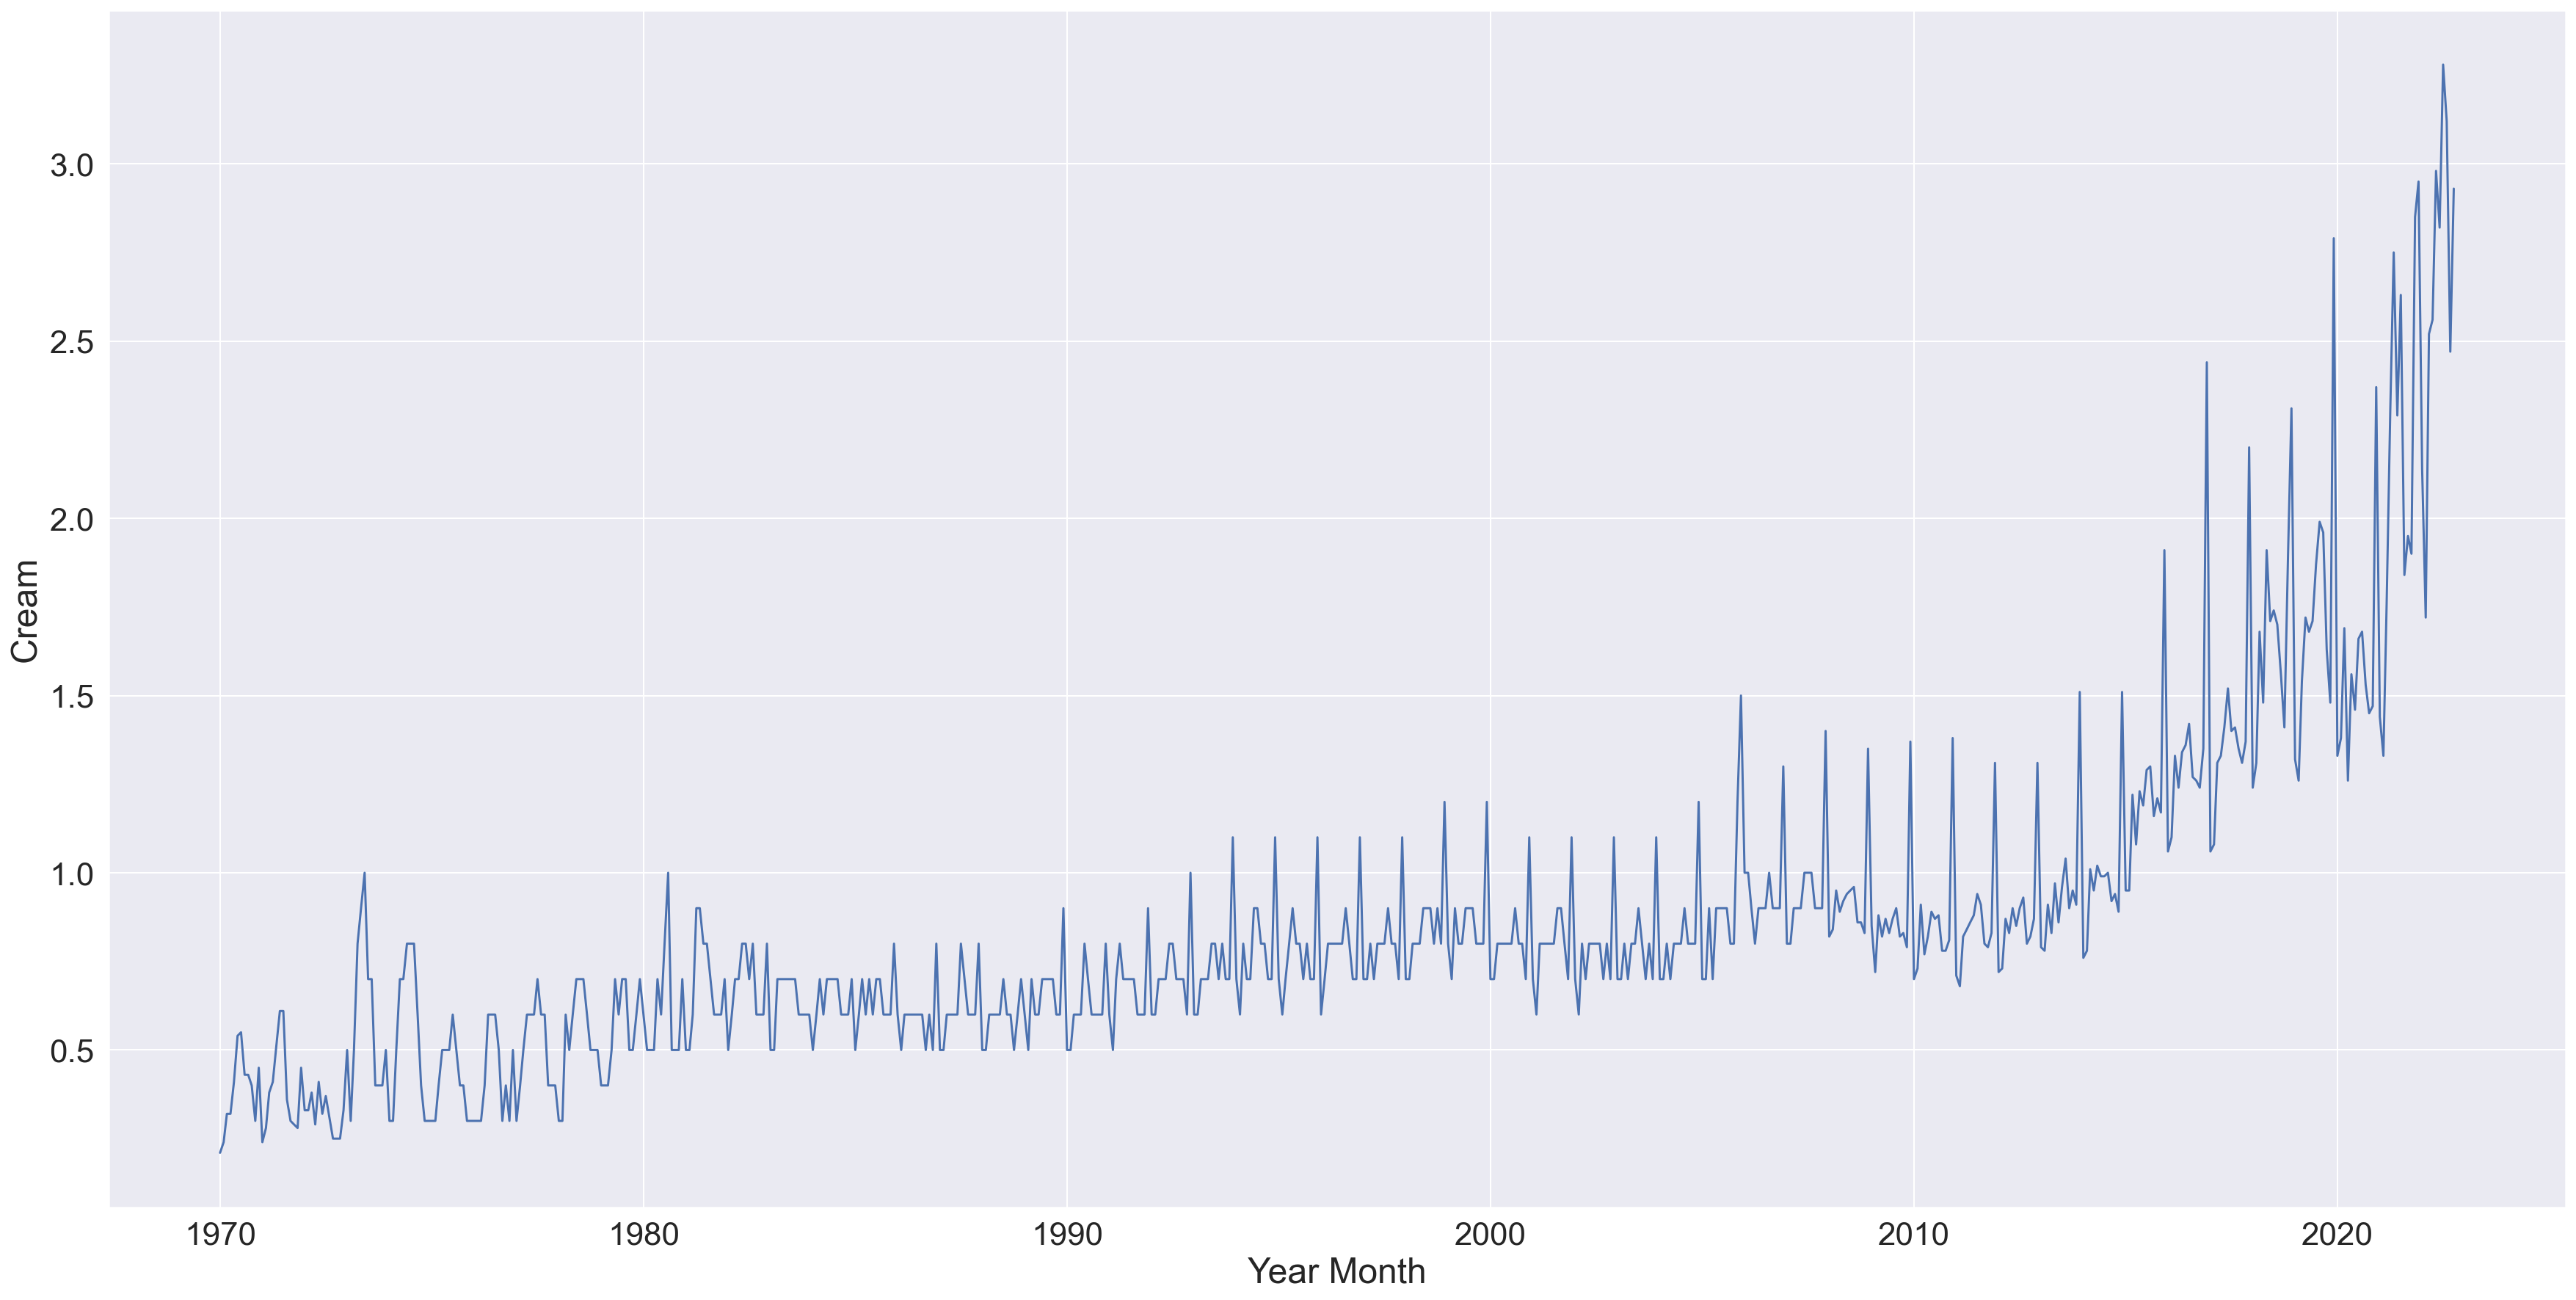

In [74]:
#Plot of Cream produced monthly data Ireland

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Cream', data = df_MilkCollected_Monthly_Ireland)
plt.show()

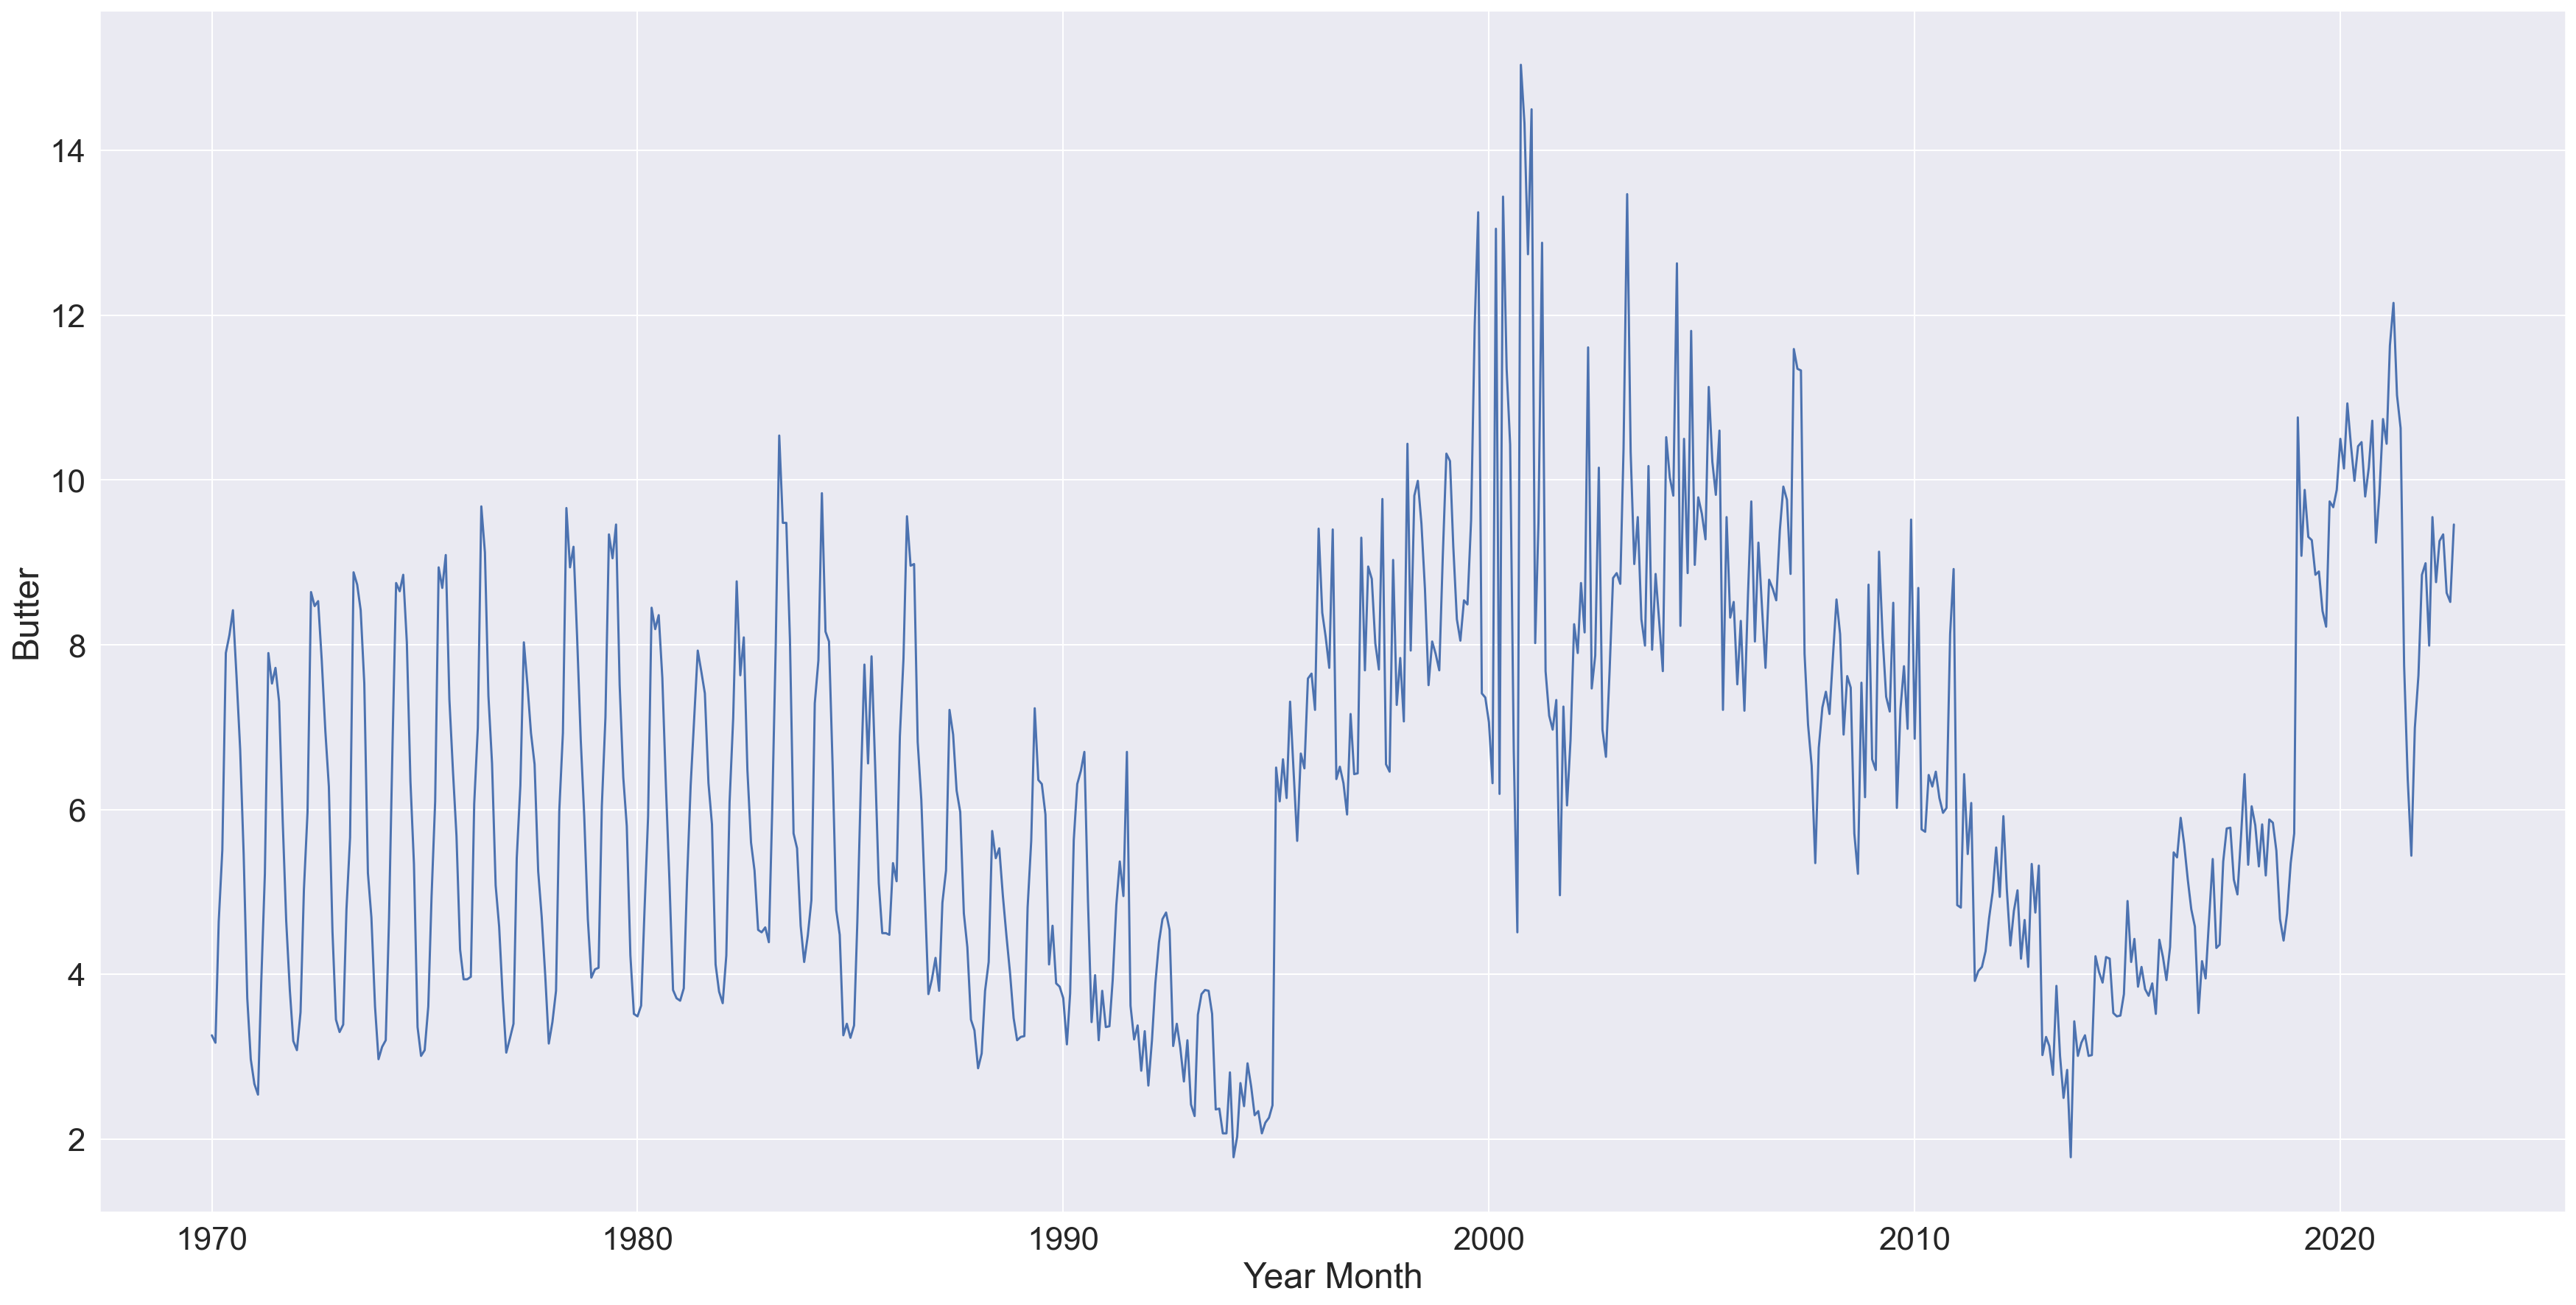

In [75]:
#Plot of Raw Milk collected monthly data Belgium

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Butter', data = df_MilkCollected_Monthly_Belgium)
plt.show()

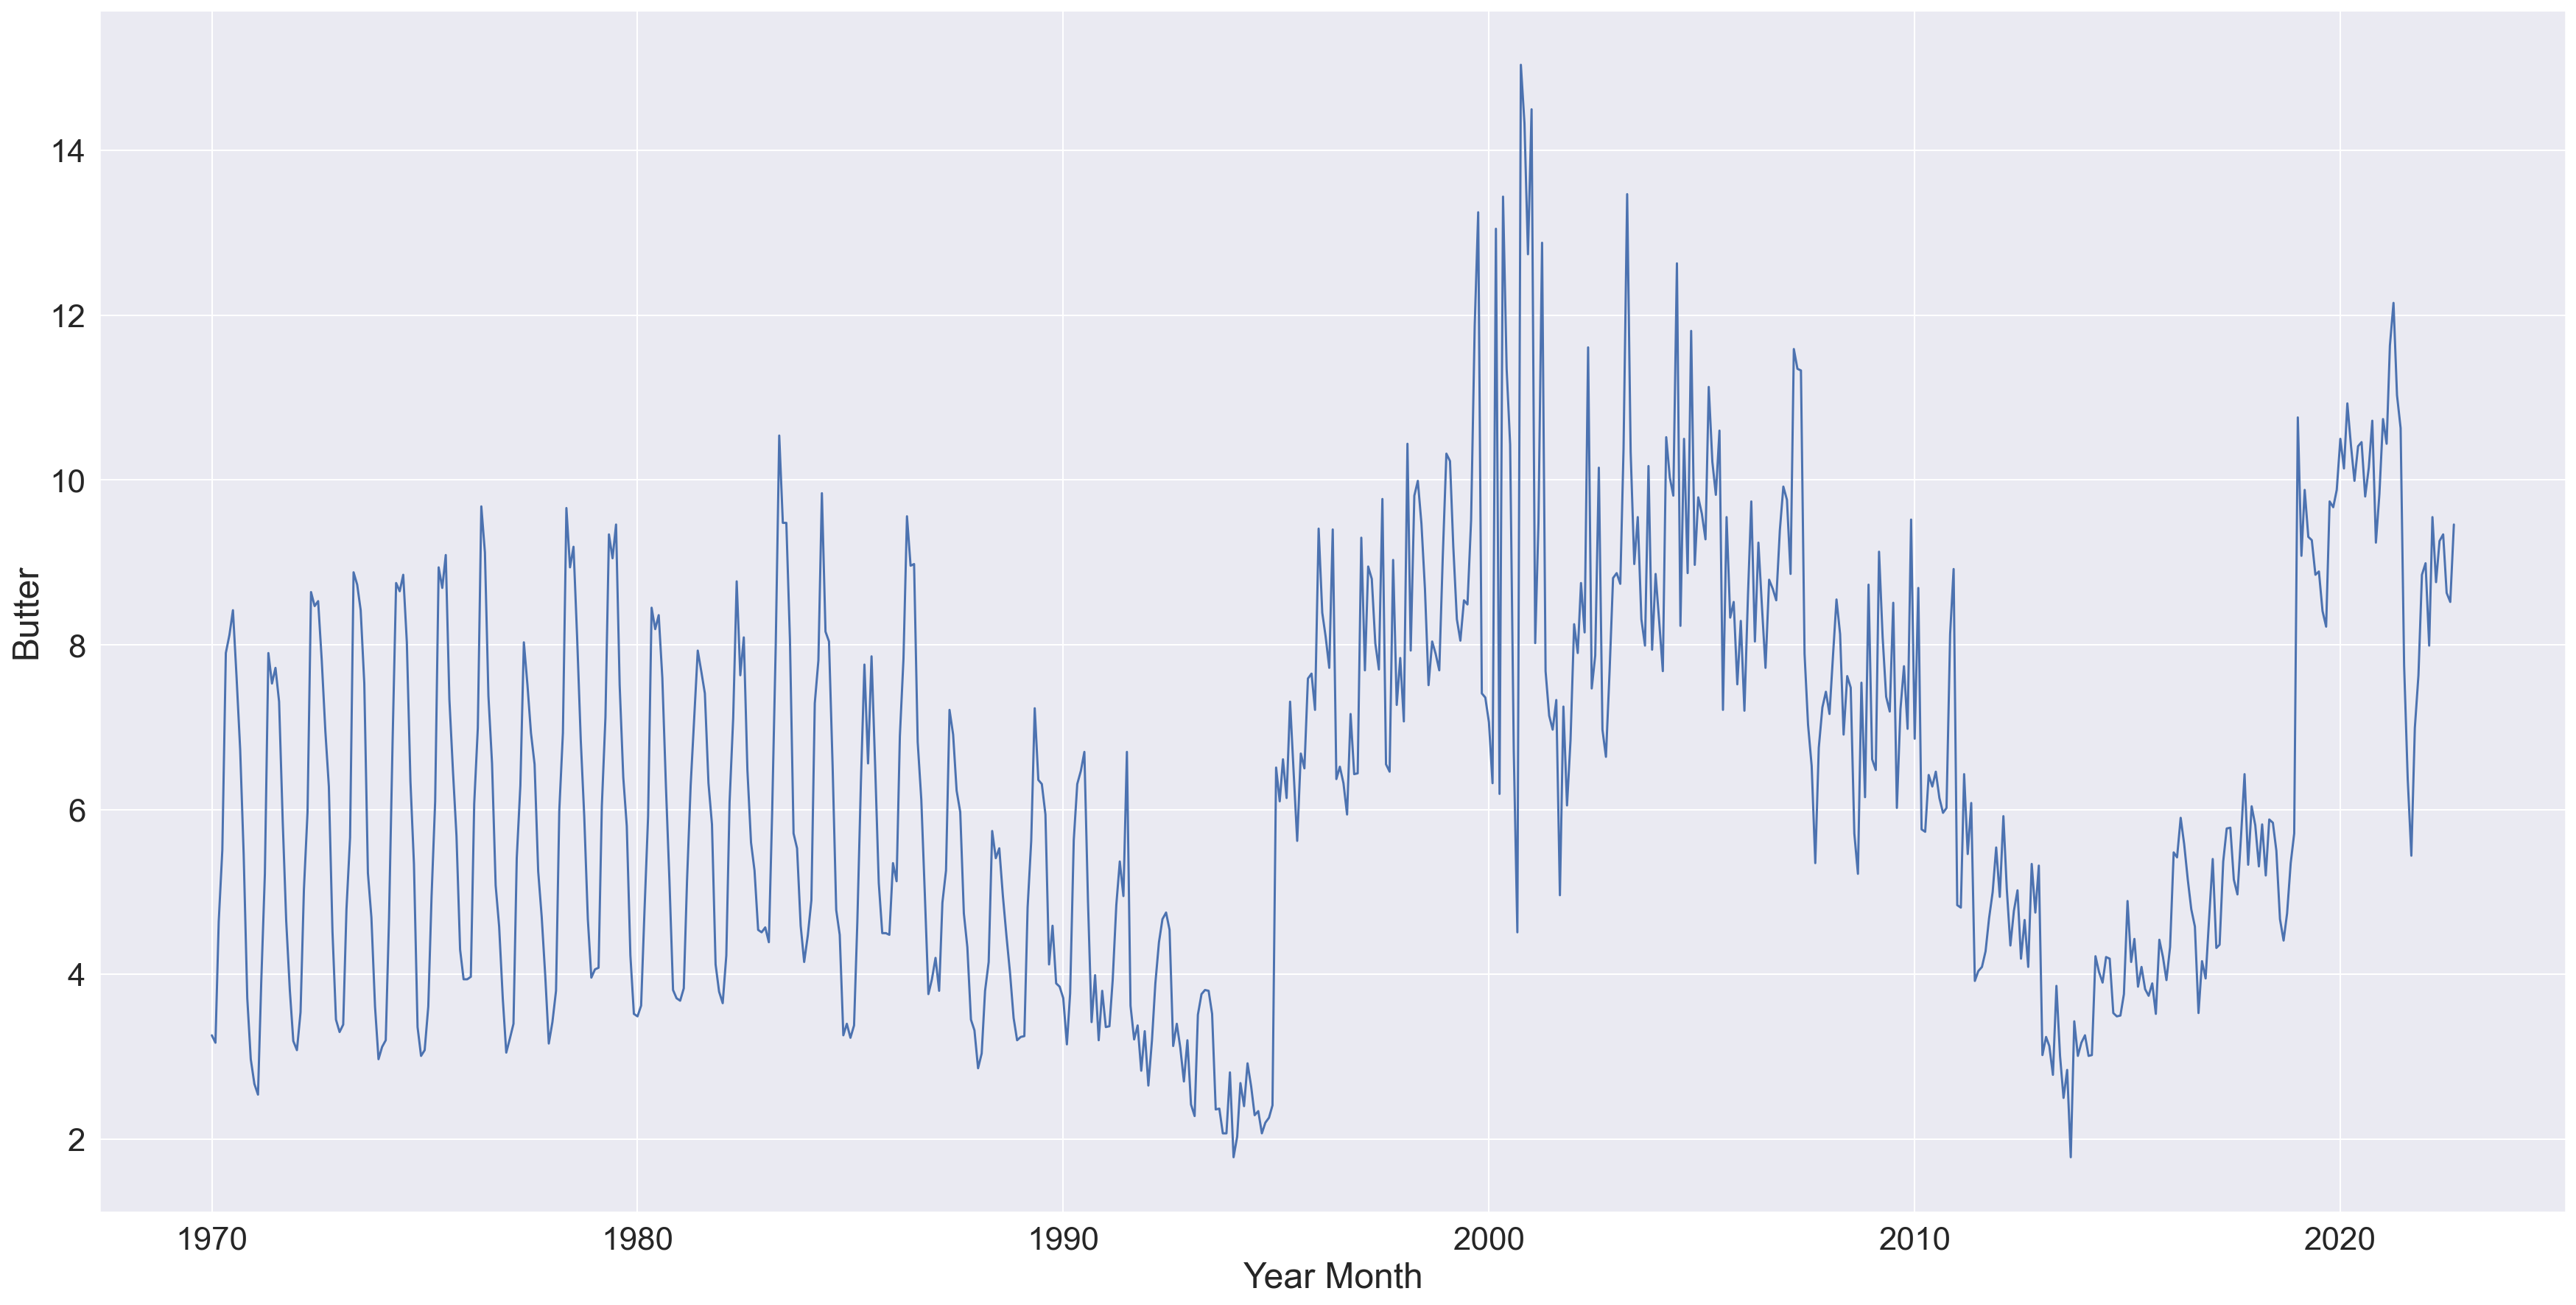

In [76]:
#Plot of Butter Produced monthly data Belgium

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Butter', data = df_MilkCollected_Monthly_Belgium)
plt.show()

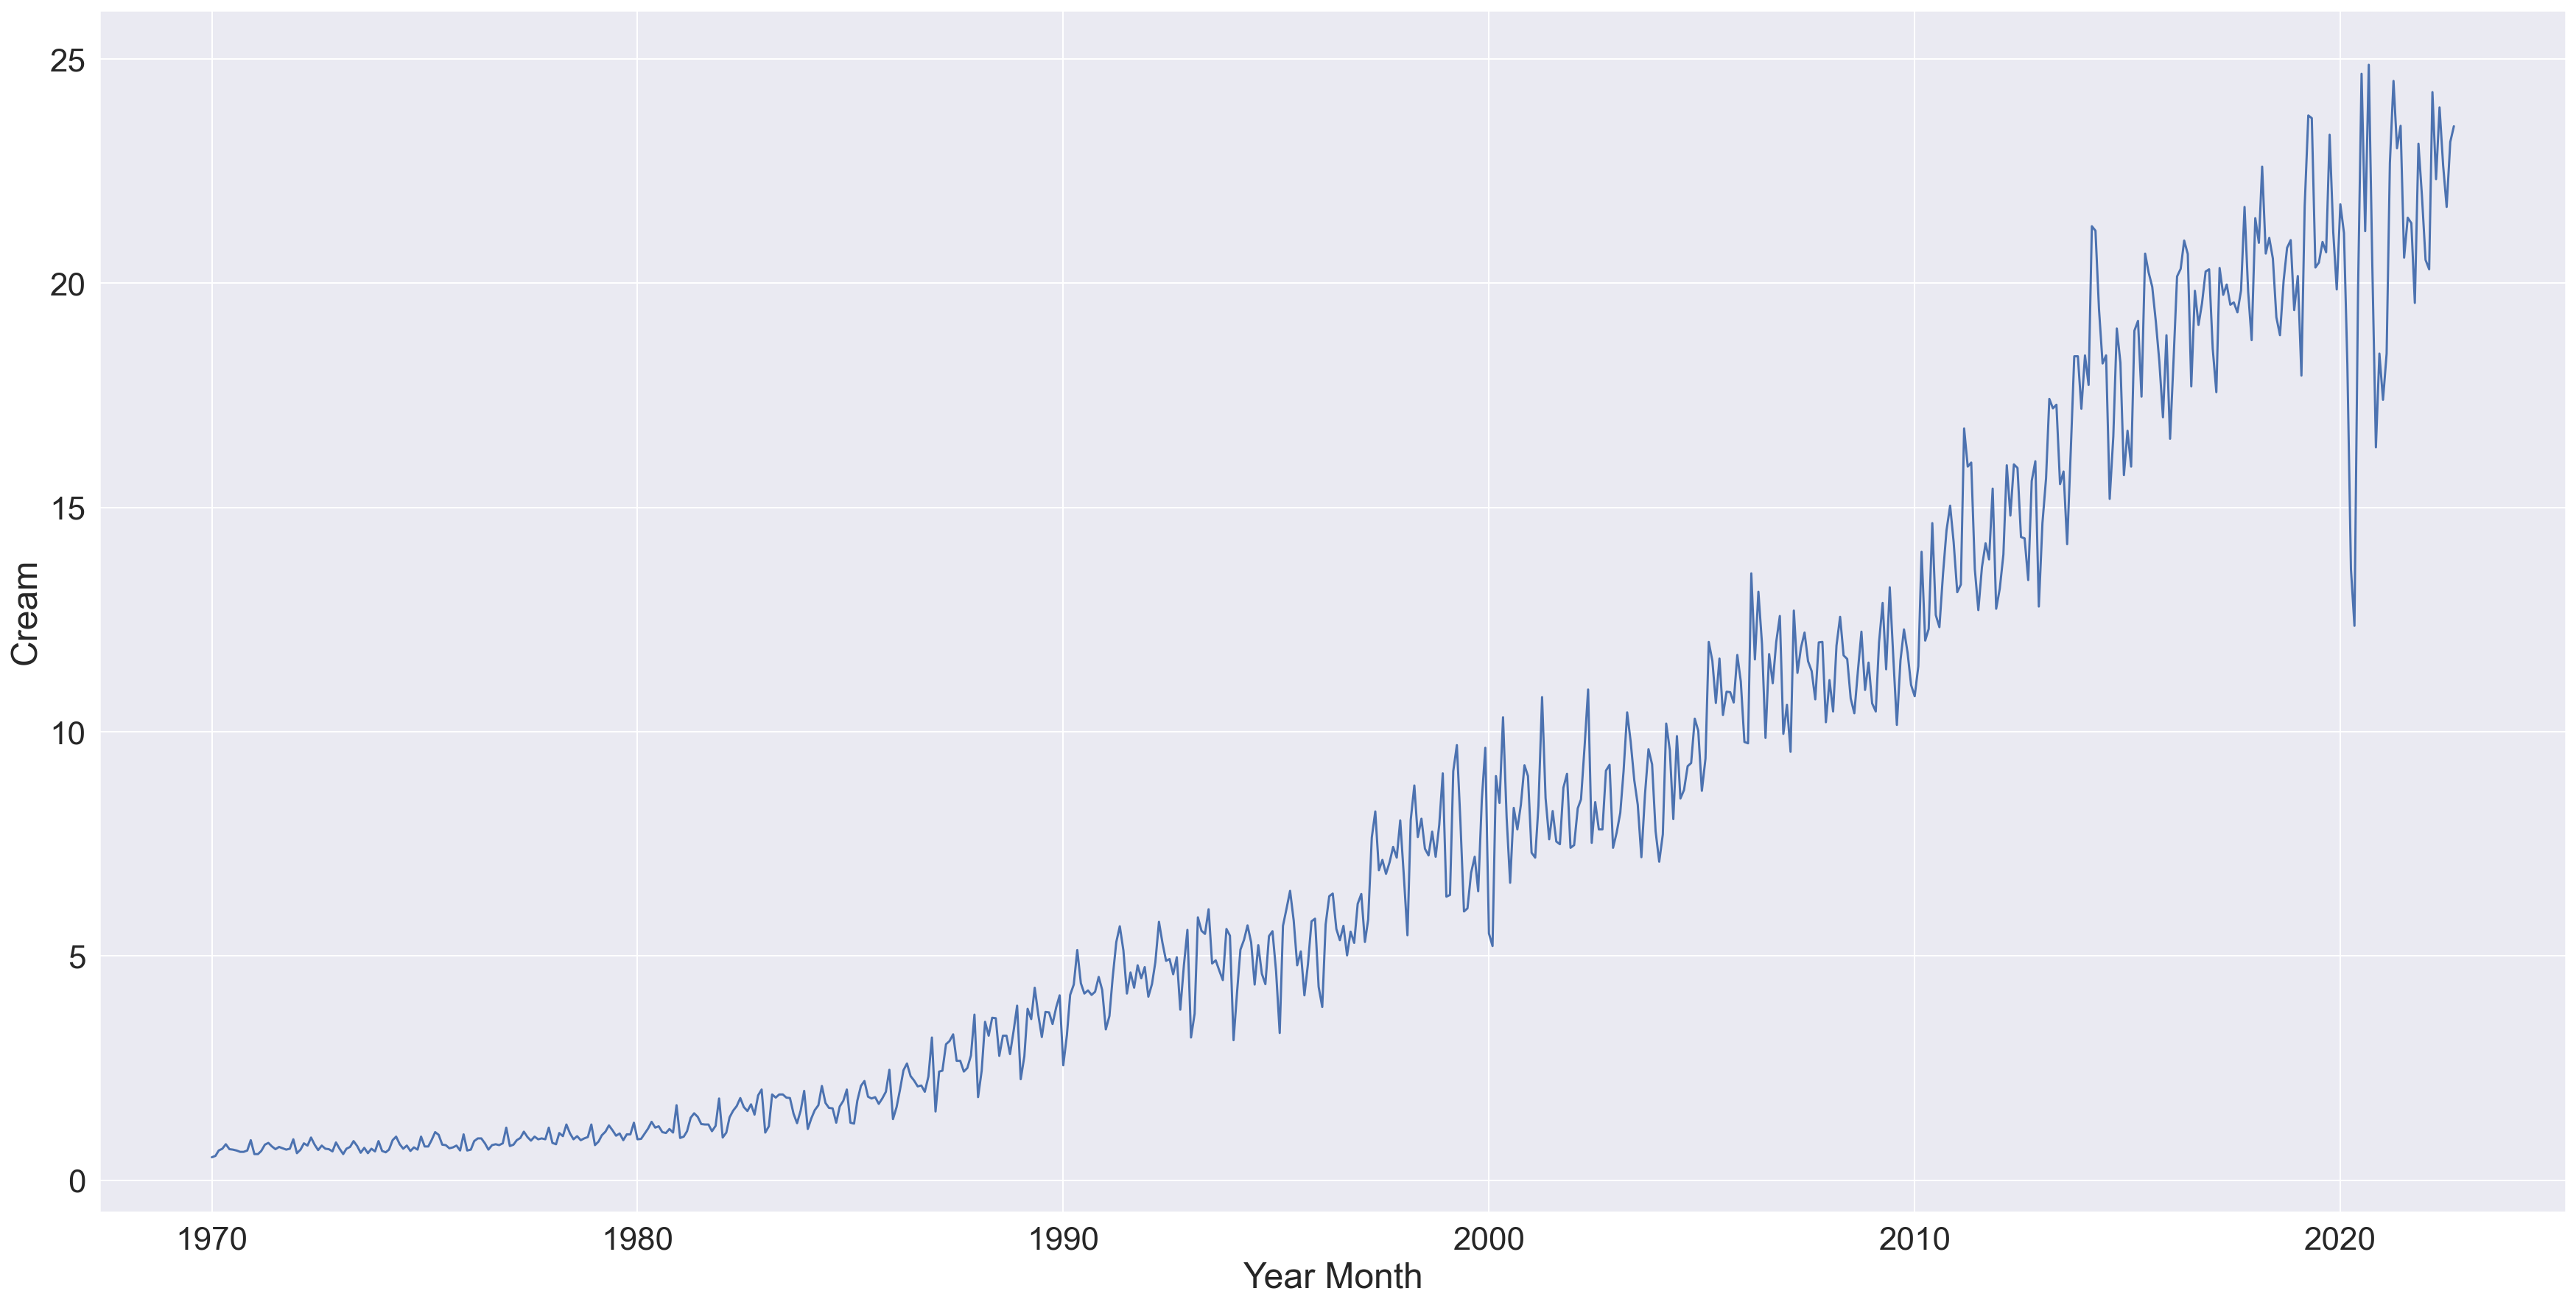

In [77]:
#Plot of Cream Produced monthly data Belgium

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Cream', data = df_MilkCollected_Monthly_Belgium)
plt.show()

### Descriptive Statistics

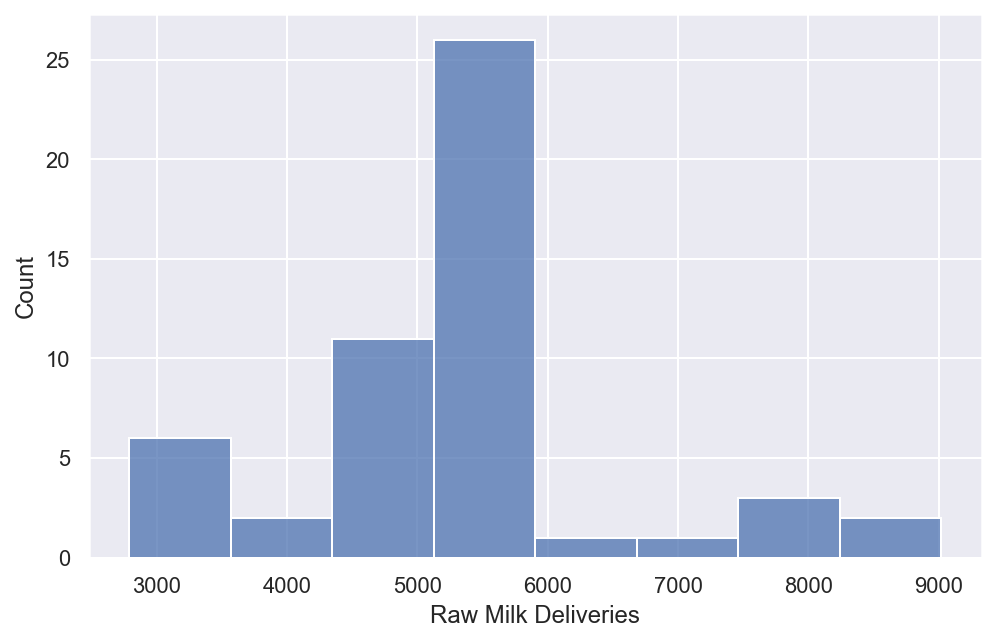

In [78]:
#Histogram of Raw Milk collected Ireland

sns.set(rc = {'figure.figsize':(8,5)})
sns.set(font_scale=1)

ax = sns.histplot(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'],bins=8) 
plt.show()

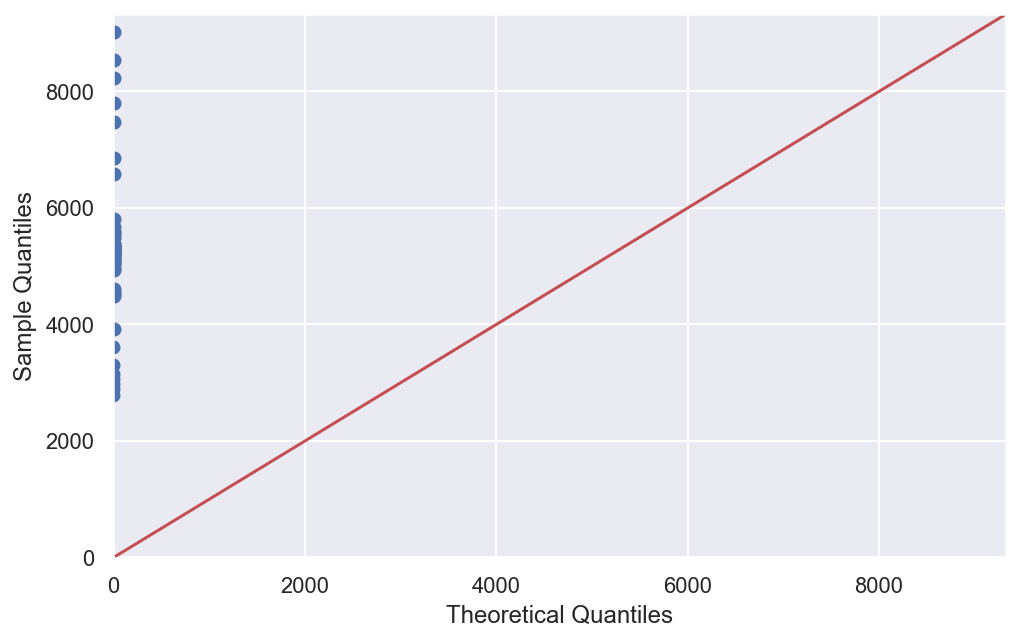

In [79]:
#Checking for normal distribution Q Q plot
fig = sm.qqplot(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'], line='45')

In [80]:
#Checking for normal distribution Shapiro Wilk test
shapiro(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'])

ShapiroResult(statistic=0.8696088790893555, pvalue=4.028079638374038e-05)

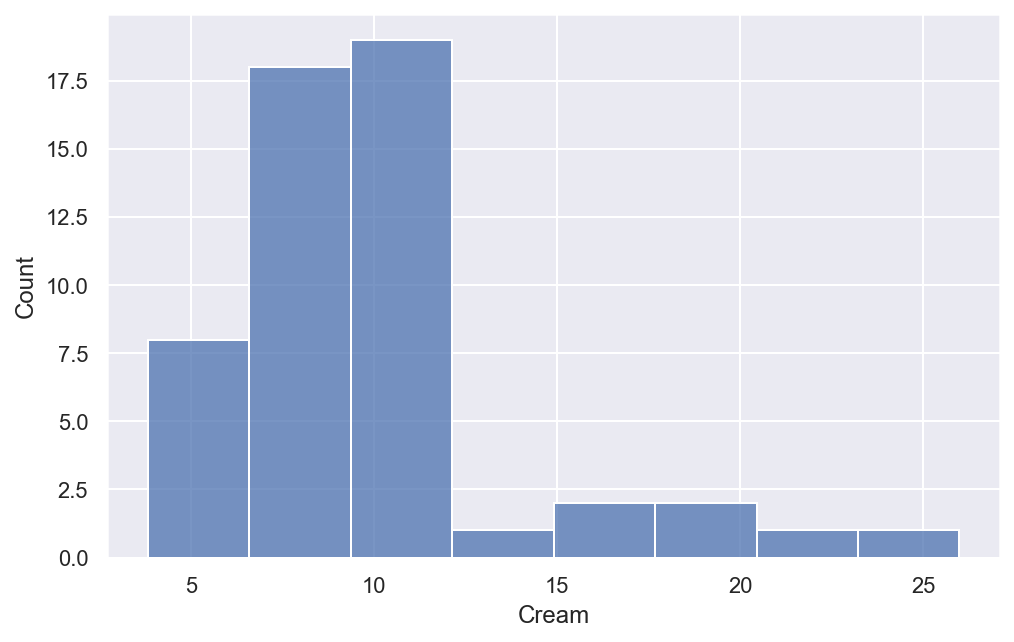

In [81]:
#Histogram of Annual Cream production Ireland

sns.set(rc = {'figure.figsize':(8,5)})
sns.set(font_scale=1)

ax = sns.histplot(df_MilkCollected_Annual_Ireland['Cream'],bins=8) 
plt.show()

In [82]:
#Checking for normal distribution Shapiro Wilk test
shapiro(df_MilkCollected_Annual_Ireland['Cream'])

ShapiroResult(statistic=0.8378015160560608, pvalue=5.184936526347883e-06)

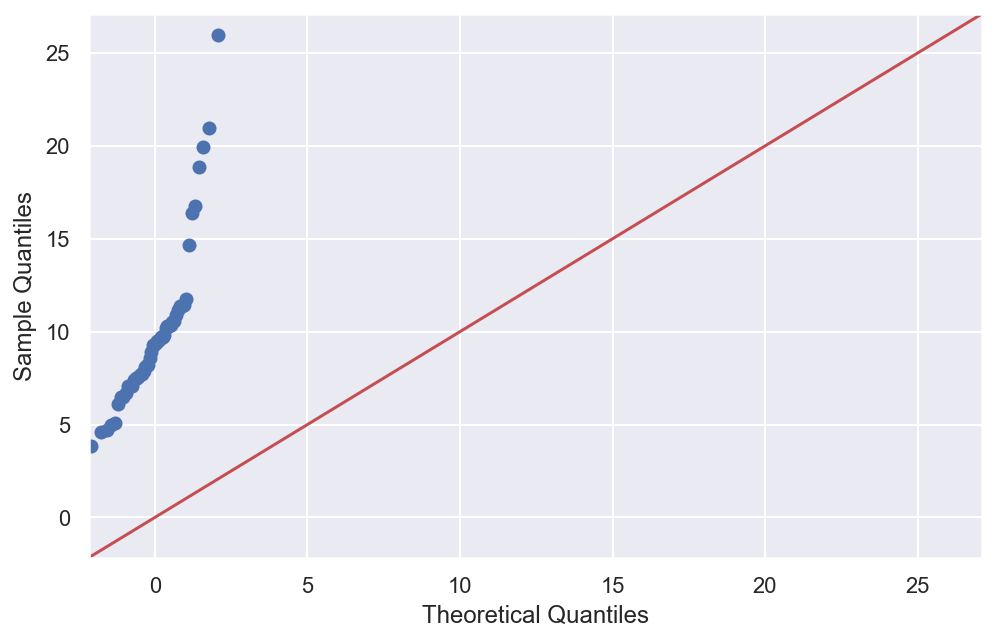

In [83]:
#Checking for normal distribution Q Q plot
fig = sm.qqplot(df_MilkCollected_Annual_Ireland['Cream'], line='45')

In [84]:
#Calculating Mean Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].mean()

5246.017307692308

In [85]:
#Calculating Median Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].median()

5254.15

In [86]:
#Calculating Mode Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].mode()

0     2790.65
1     2891.01
2     2981.80
3     3061.48
4     3148.39
5     3308.10
6     3608.40
7     3922.70
8     4492.30
9     4525.40
10    4556.10
11    4610.90
12    4927.53
13    4948.50
14    5018.90
15    5061.20
16    5089.94
17    5091.20
18    5121.00
19    5160.30
20    5181.60
21    5196.40
22    5201.70
23    5224.50
24    5224.70
25    5252.10
26    5256.20
27    5267.80
28    5268.30
29    5271.40
30    5271.60
31    5288.40
32    5297.10
33    5310.00
34    5327.02
35    5338.10
36    5341.10
37    5379.70
38    5388.20
39    5478.30
40    5536.68
41    5583.69
42    5585.00
43    5681.60
44    5816.23
45    6585.13
46    6851.63
47    7475.42
48    7810.24
49    8226.62
50    8542.27
51    9018.37
Name: Raw Milk Deliveries, dtype: float64

In [87]:
#Converting to int and then Calculating Mode Raw Milk Deliveries Ireland 
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].astype(int).mode()

0    5224
1    5271
Name: Raw Milk Deliveries, dtype: int32

In [88]:
#Calculating Standard Deviation for Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].std()

1307.875507565857

In [89]:
#Calculating Mean Butter produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].mean()

144.24038461538458

In [90]:
#Calculating Mean Butter produced Belgium
df_MilkCollected_Annual_Belgium['Butter'].mean()

76.39769230769231

In [91]:
#Calculating Median Butter produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].median()

141.35

In [92]:
#Calculating Mode Butter produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].mode()

0      70.74
1      72.60
2      73.45
3      75.56
4      83.30
5      83.41
6      98.50
7     101.70
8     111.00
9     112.10
10    118.80
11    122.30
12    122.76
13    123.90
14    126.32
15    132.90
16    133.50
17    134.30
18    135.60
19    137.20
20    137.83
21    139.00
22    139.10
23    139.70
24    140.10
25    140.50
26    142.20
27    142.80
28    143.20
29    143.50
30    143.70
31    144.90
32    145.01
33    145.91
34    147.20
35    148.40
36    148.50
37    151.80
38    152.05
39    152.30
40    153.40
41    158.30
42    160.70
43    165.00
44    166.38
45    187.48
46    198.70
47    223.67
48    237.84
49    251.07
50    264.72
51    275.60
Name: Butter, dtype: float64

In [93]:
#Converting to int and then Calculating Mode Butter produced Ireland 
df_MilkCollected_Annual_Ireland['Butter'].astype(int).mode()

0    139
1    143
Name: Butter, dtype: int32

In [94]:
#Calculating Standard Deviarion Butter Produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].std()

44.60216058960524

In [95]:
#Calculating Skewness for Raw Milk Deliveries Ireland
skew(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'])

0.6749221815285303

In [96]:
#Calculating Skewness for Butter Produced Ireland
skew(df_MilkCollected_Annual_Ireland['Butter'])

1.0339301504225076

In [97]:
#Calculating Skewness for Cream Produced Ireland
skew(df_MilkCollected_Annual_Ireland['Cream'])

1.6946852927690197

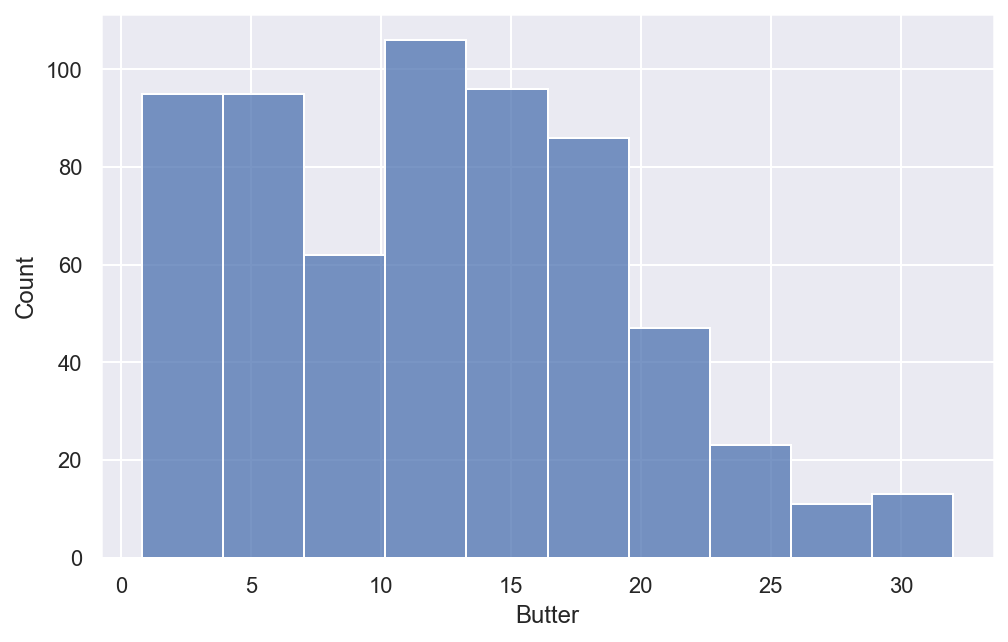

In [98]:
#Histogram of Butter collected Ireland Monthly

sns.set(rc = {'figure.figsize':(8,5)})
sns.set(font_scale=1)

ax = sns.histplot(df_MilkCollected_Monthly_Ireland['Butter'],bins=10) 
plt.show()

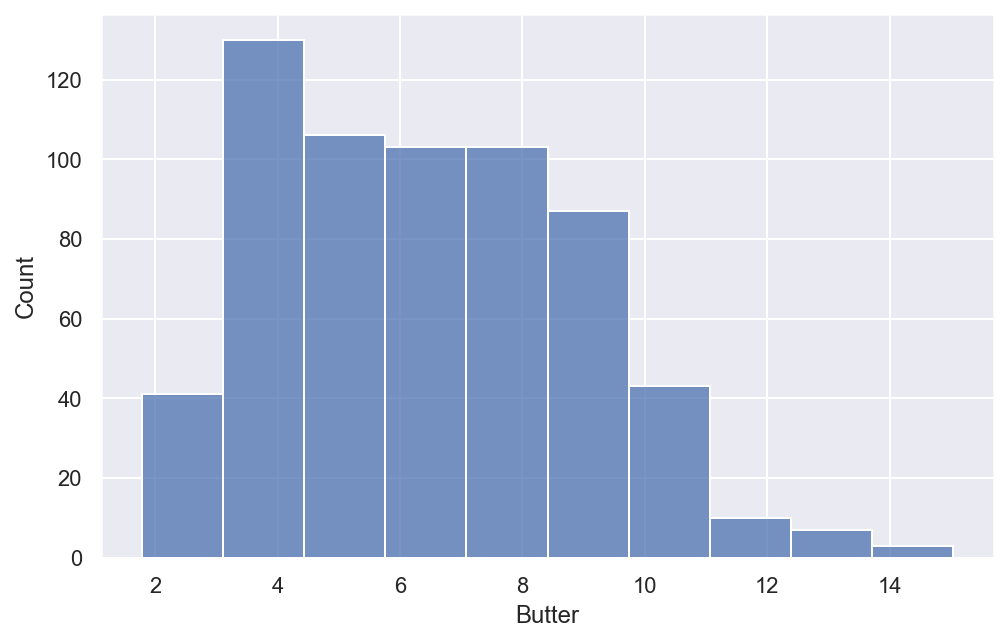

In [99]:
#Histogram of Butter collected Belgium Monthly

sns.set(rc = {'figure.figsize':(8,5)})
sns.set(font_scale=1)

ax = sns.histplot(df_MilkCollected_Monthly_Belgium['Butter'],bins=10) 
plt.show()

### Central Limit Theorem

In [100]:
def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    sample_means.append(sample_mean)
  return sample_means

In [101]:
ireland_butter = df_MilkCollected_Annual_Ireland['Butter']
ireland_butter = sample_mean_calculator(ireland_butter,10,50)

belgium_butter = df_MilkCollected_Monthly_Belgium['Butter']
belgium_butter = sample_mean_calculator(belgium_butter,10,50)



C:\Users\tonyw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

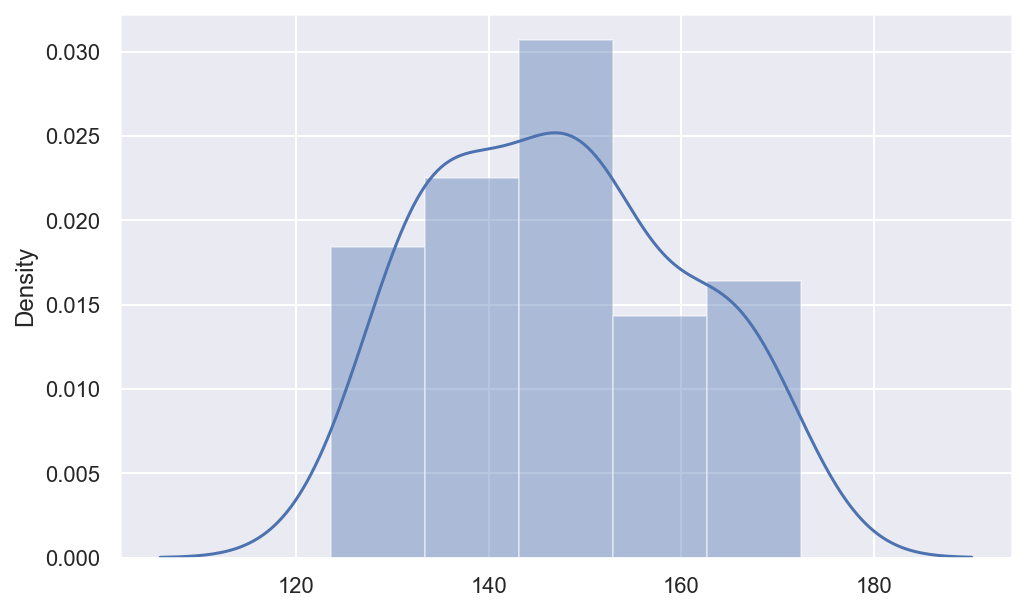

In [102]:
sns.distplot(ireland_butter)

C:\Users\tonyw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

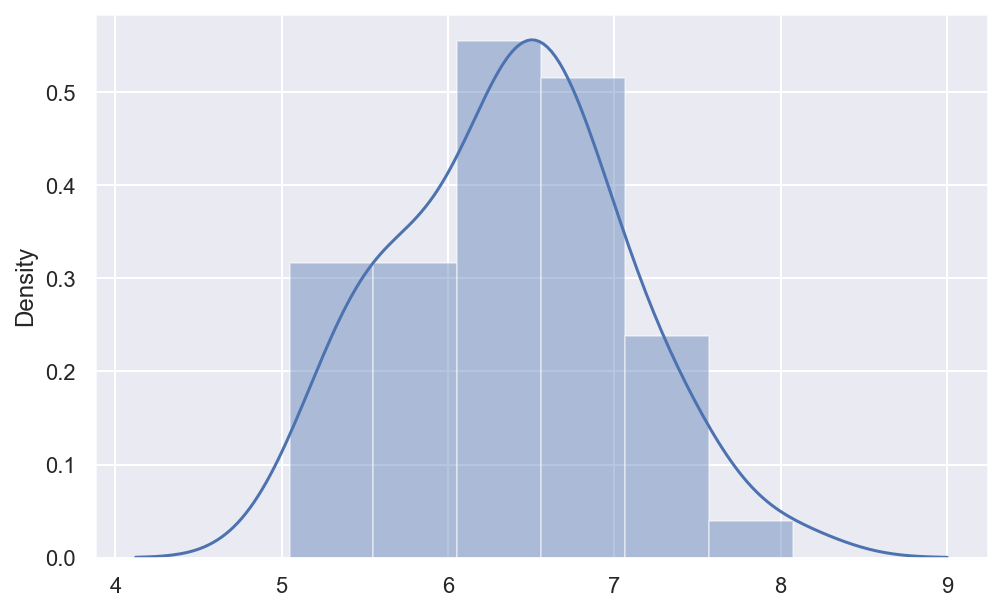

In [103]:
sns.distplot(belgium_butter)

In [104]:
#Checking for normal distribution Shapiro Wilk test
shapiro(ireland_butter)

ShapiroResult(statistic=0.9624409675598145, pvalue=0.1125035211443901)

In [105]:
#Checking for normal distribution Shapiro Wilk test
shapiro(belgium_butter)

ShapiroResult(statistic=0.986934244632721, pvalue=0.8504973649978638)

In [106]:
sum(belgium_butter) / len(belgium_butter)

6.374560000000003

In [107]:
sum(ireland_butter) / len(ireland_butter)

147.33342000000002

In [108]:
ireland_butter = df_MilkCollected_Annual_Ireland['Butter']
belgium_butter = df_MilkCollected_Annual_Belgium['Butter']
france_butter = df_MilkCollected_Annual_France['Butter']

In [109]:
stats.mannwhitneyu(ireland_butter, belgium_butter, alternative='two-sided')

MannwhitneyuResult(statistic=2536.0, pvalue=1.4243307436295085e-14)

In [110]:
stats.kruskal(ireland_butter, belgium_butter, france_butter)

KruskalResult(statistic=129.75479591452154, pvalue=6.669665705569829e-29)

## Machine Learning Section

In [111]:
df_MilkCollected_Monthly_Ireland.head()

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter  \
5251  Ireland  IE  IRL  1970                63.74  33.86   0.21    1.01   
5252  Ireland  IE  IRL  1970                76.61  31.77   0.24    1.29   
5253  Ireland  IE  IRL  1970               149.14  34.43   0.32    3.04   
5254  Ireland  IE  IRL  1970               232.22  33.74   0.32    5.28   
5255  Ireland  IE  IRL  1970               366.30  35.30   0.41   10.03   

      Month Year Month  
5251      1 1970-01-01  
5252      2 1970-02-01  
5253      3 1970-03-01  
5254      4 1970-04-01  
5255      5 1970-05-01

In [134]:
df_Milk_Monthly_Ireland_77.head()

Country Geo Code  Year  Raw Milk Deliveries  Milk  Cream  Butter  Month  \
0  Ireland  IE  IRL  1977                 68.7  33.6    0.3     1.1      1   
1  Ireland  IE  IRL  1977                117.1  31.4    0.4     2.6      2   
2  Ireland  IE  IRL  1977                244.0  34.4    0.5     5.9      3   
3  Ireland  IE  IRL  1977                411.7  33.2    0.6    10.0      4   
4  Ireland  IE  IRL  1977                583.9  34.8    0.6    14.8      5   

  Year Month  Milk Selling Price  
0 1977-01-01               14.62  
1 1977-02-01               15.05  
2 1977-03-01               14.12  
3 1977-04-01               14.19  
4 1977-05-01               14.61

#### Linear Regression Model

In [113]:
#dfTimeSeries = df_MilkCollected_Monthly_Ireland

dfTimeSeries = df_Milk_Monthly_Ireland_77.copy()

#Drop unwanted columns
#dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,3,4,5,6,9]], axis = 1,)

dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,9]], axis = 1,)


#Add dummy values for Hour to the machine learning dataframe
dfTimeSeries = pd.get_dummies(dfTimeSeries, prefix = ['Month'], columns = ['Month'], drop_first = True)

# X and y are the array variables that store the independent and dependent variables
y = dfTimeSeries['Milk Selling Price']
X = dfTimeSeries.drop(columns=['Milk Selling Price'])

# Split the dataset by using train_test_splitting to 25% and 75% for training and a seed of 42
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_Train, y_Train)

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_Train, y_Train)))
print("Test set score: {:.2f}".format(lr.score(X_Test, y_Test)))


Training set score: 0.74
Test set score: 0.75


#### Ridge Regression

In [114]:
# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_Train, y_Train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_Train, y_Train)))
print("Test set score: {:.2f}".format(ridge.score(X_Test, y_Test)))

Training set score: 0.74
Test set score: 0.74


#### GridSearchCV

In [115]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_Train, y_Train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6991071641266254
Best Params:  {'alpha': 10}


#### Polynomial Regression

In [116]:
#Set the degree to use (Degree 2 = x**2)
poly_reg = PolynomialFeatures(degree = 2)

#Transform and fit to data
xPoly = poly_reg.fit_transform(X)

# Split the dataset by using train_test_splitting to 25% and 75% for training and a seed of 42
X_Train, X_Test, y_Train, y_Test = train_test_split(xPoly, y, random_state = 42)

lr = LinearRegression().fit(X_Train, y_Train)

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_Train, y_Train)))
print("Test set score: {:.2f}".format(lr.score(X_Test, y_Test)))

Training set score: 0.86
Test set score: 0.81


#### k-fold Cross Validation

In [117]:
# k-fold Cross Validation for Linear Regression
# k-fold Cross Validation with 8 splits
splitScores = cross_val_score(lr, X_Train, y_Train, scoring = 'r2', cv = 8)

# Display the score values
print(f'k-fold Cross Validation scores: {splitScores}')
print(f'Mean of Cross Validation scores: {round(np.mean(splitScores),2)}')

k-fold Cross Validation scores: [0.69499667 0.77493031 0.73284533 0.62520477 0.83815673 0.62117467
 0.7599147  0.67471643]
Mean of Cross Validation scores: 0.72


#### Autoregressive model

C:\Users\tonyw\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



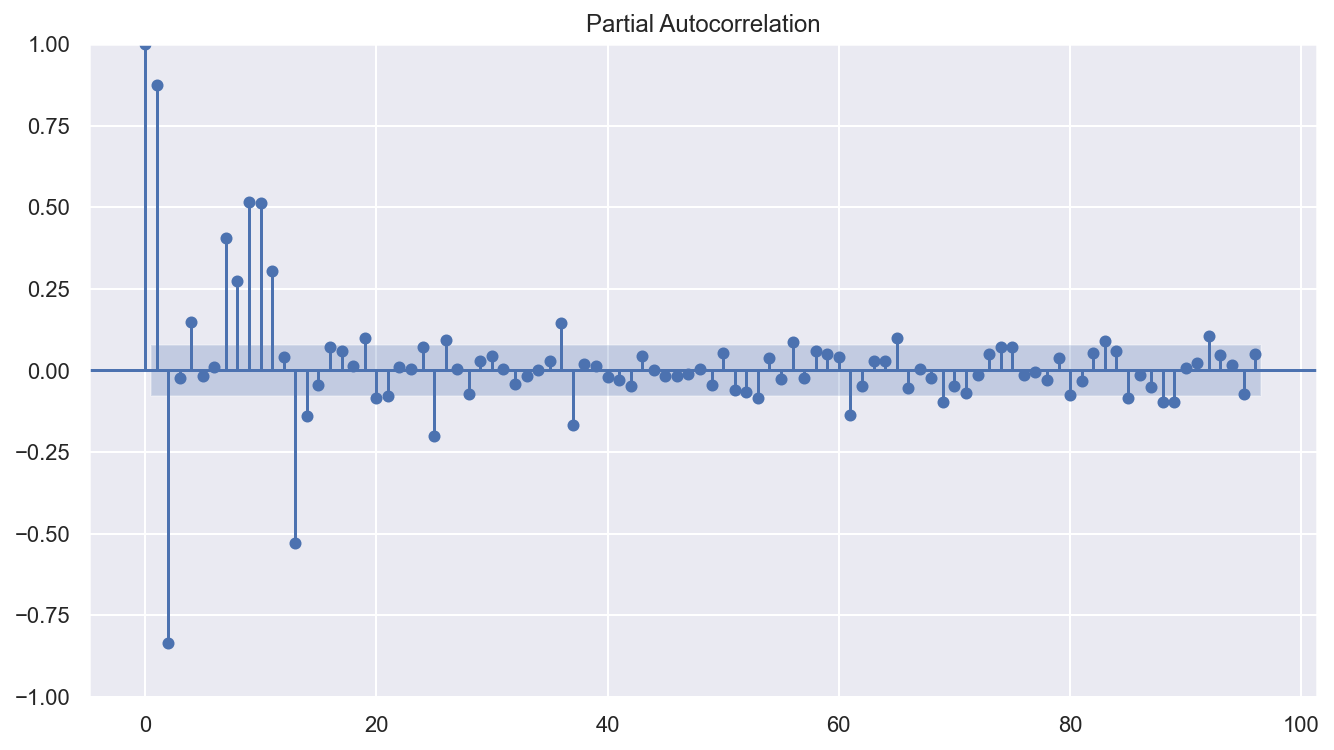

In [118]:
dfTimeSeries = df_MilkCollected_Monthly_Ireland.copy()
#Plot of Partial Autocorrelation for North Strand Rd S/B
sns.set(rc = {'figure.figsize':(11,6)})
sns.set(font_scale=1)
acf_plot = plot_pacf(dfTimeSeries['Raw Milk Deliveries'], lags =96)

In [119]:
dfTimeSeries = df_Milk_Monthly_Ireland_77.copy()

#Drop all columns excet for Butter
dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,3,4,6,7,8,9,10]], axis = 1,)
                                                
#dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,9]], axis = 1,)

#Set the size of the training data and test data. 
dfTrainData = dfTimeSeries[0:84]
dfTestData = dfTimeSeries[75:108]

#Convert dataframes to a series  
trainData = dfTrainData.squeeze()
testData = dfTestData.squeeze()

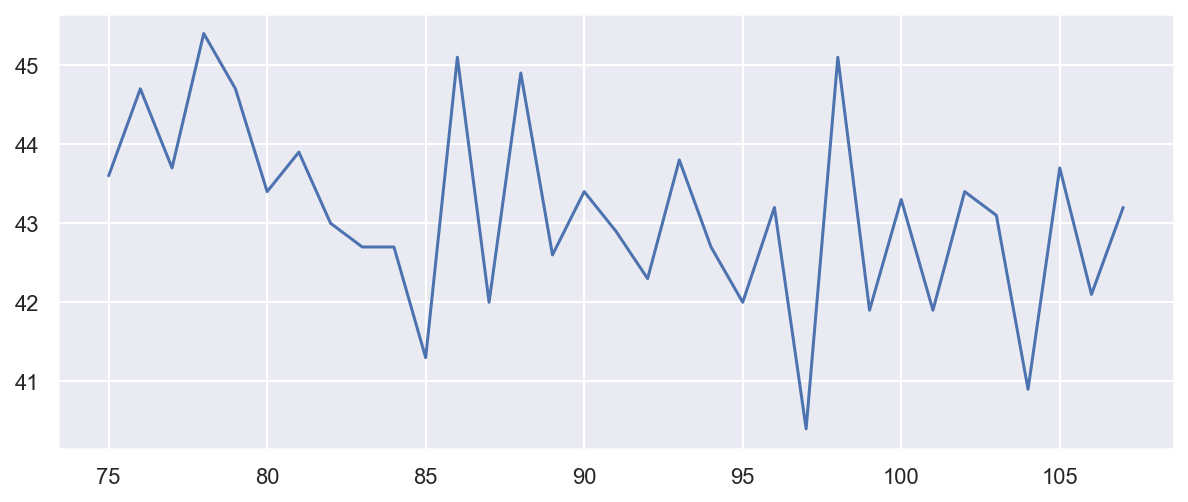

In [120]:
#Plot the pattern of the test data
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(testData)

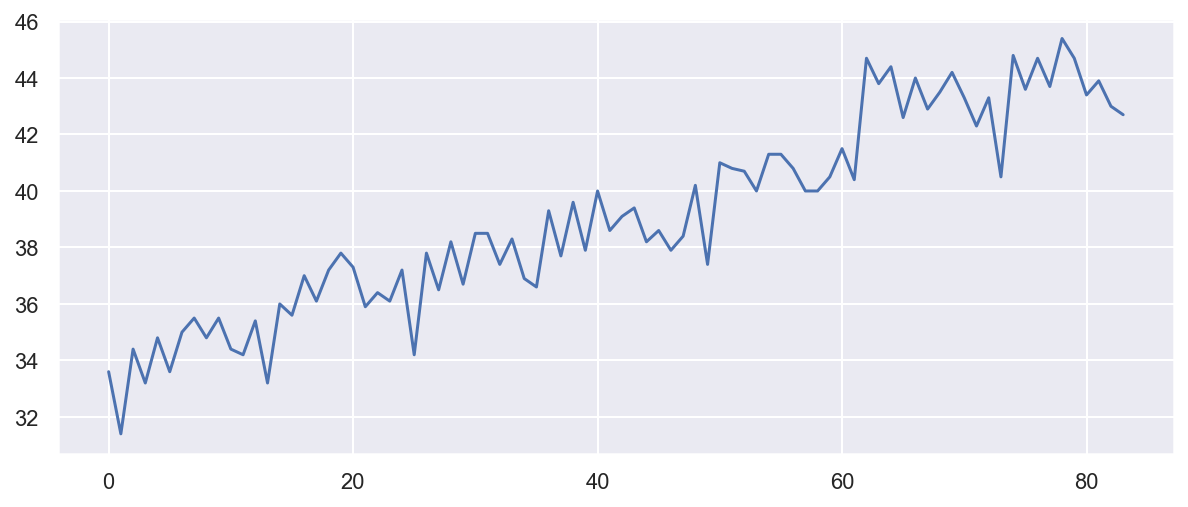

In [121]:
#Plot the pattern of the training data
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(trainData)

In [122]:
#Run the AutoReg function with 16 lags
model = AutoReg(trainData, 16)

#Estimate the model parameters 
modelFit = model.fit()

#Print Model Results
print(modelFit.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Milk   No. Observations:                   84
Model:                    AutoReg(16)   Log Likelihood                 -78.241
Method:               Conditional MLE   S.D. of innovations              0.765
Date:                Tue, 13 Dec 2022   AIC                            192.481
Time:                        15:29:36   BIC                            232.432
Sample:                            16   HQIC                           208.311
                                   84                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4722      1.373      1.072      0.284      -1.219       4.164
Milk.L1        0.4558      0.119      3.824      0.000       0.222       0.689
Milk.L2        0.1223      0.132      0.923      0.3

In [123]:
#Use the model to predict the test data size into the future

#Set parameters for start and end predictions
predictionStart = testData.index[0]
predictionEnd = testData.index[-1]

#Call the model to make predictions
predictions = modelFit.predict(start=predictionStart, end=predictionEnd)

#Difference between test and predictions
residuals = testData - predictions

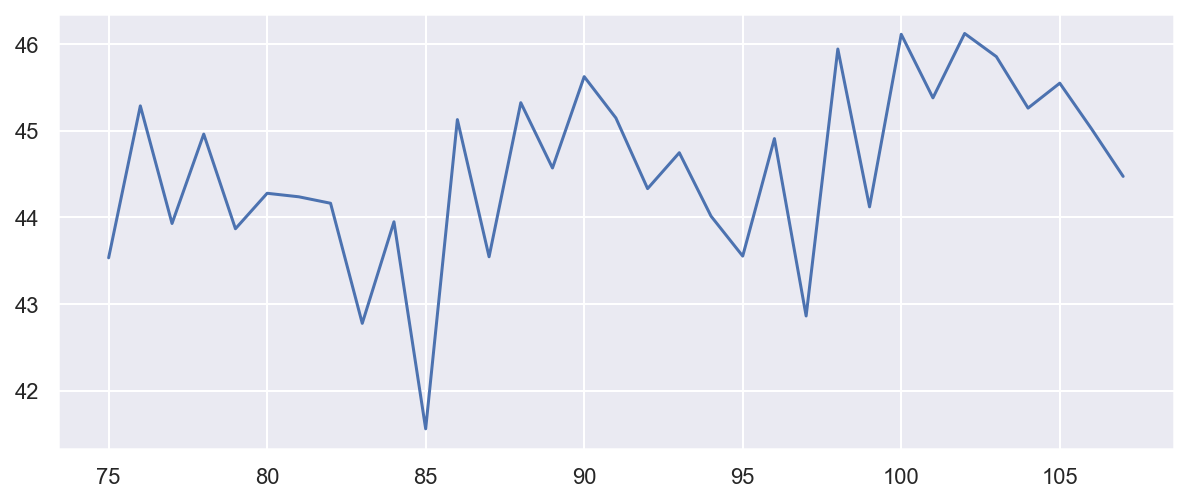

In [124]:
#Plot the pattern of the predictions
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(predictions)

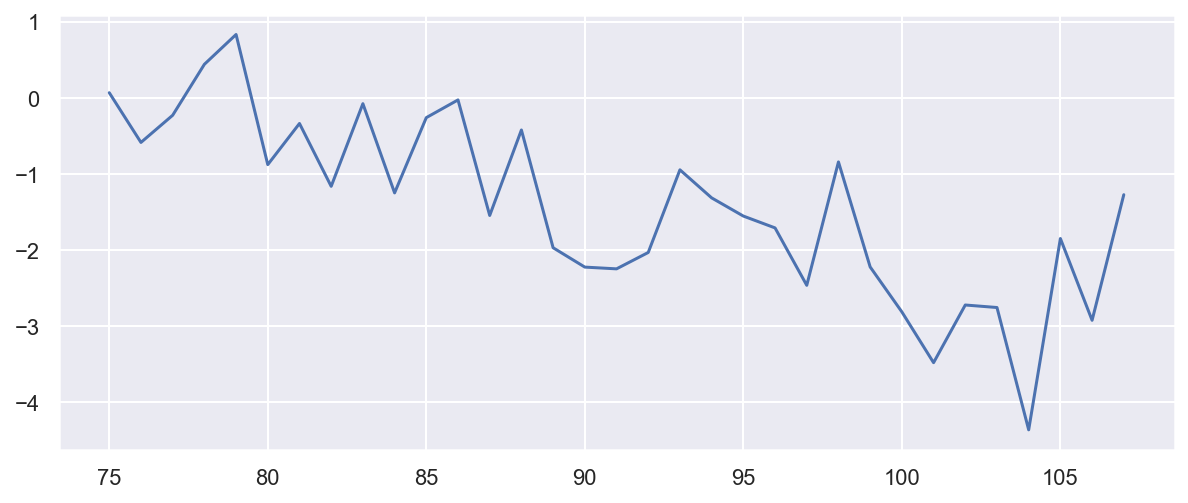

In [125]:
#Plot the pattern of the residuals
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(residuals)

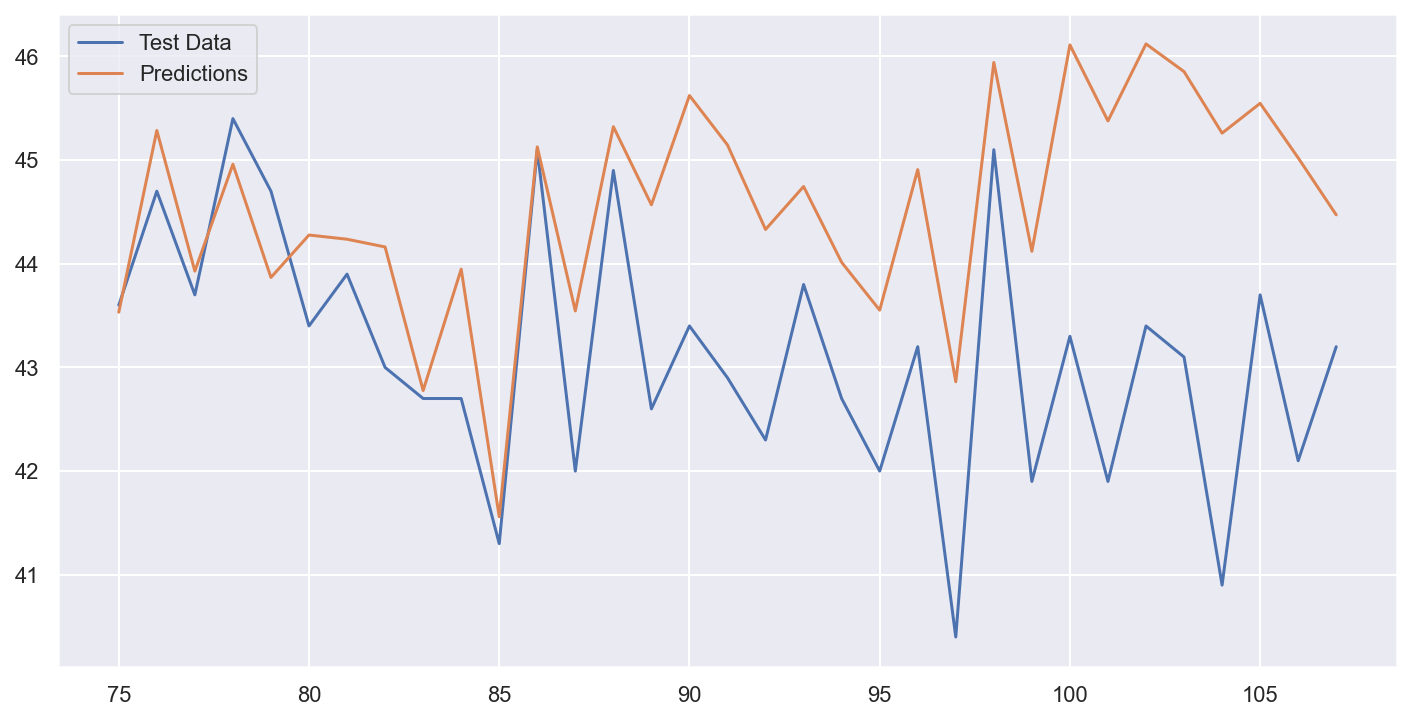

In [126]:
#Plot the graph of the Test Data vs Predictions 
plt.figure(figsize=(12,6))
#sns.set(font_scale=1)

plt.plot(testData)
plt.plot(predictions)
plt.legend(('Test Data','Predictions'))

In [127]:
#Calculate Root Mean Squared error
print(f'Root Mean Squared error is: {round(np.sqrt(np.mean(residuals**2)),2)}')

Root Mean Squared error is: 1.85


In [128]:
#Month and Butter only

dfTimeSeries = df_Milk_Monthly_Ireland_77.copy()

#Drop unwanted columns
#dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,3,4,5,6,9]], axis = 1,)

dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0, 1, 2, 3,  5, 6, 7,9, 10]], axis = 1,)


#Add dummy values for Hour to the machine learning dataframe
dfTimeSeries = pd.get_dummies(dfTimeSeries, prefix = ['Month'], columns = ['Month'], drop_first = True)

# X and y are the array variables that store the independent and dependent variables
y = dfTimeSeries['Raw Milk Deliveries']
X = dfTimeSeries.drop(columns=['Raw Milk Deliveries'])

# Split the dataset by using train_test_splitting to 25% and 75% for training and a seed of 42
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_Train, y_Train)

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_Train, y_Train)))
print("Test set score: {:.2f}".format(lr.score(X_Test, y_Test)))


Training set score: 0.85
Test set score: 0.75


In [129]:
dfTimeSeries = df_Milk_Monthly_Ireland_77.copy()

#Drop all columns excet for Butter
dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,3,4,6,7,8,9,10]], axis = 1,)
                                                
#Convert dataframes to a series  
timeSeries = dfTimeSeries.squeeze()

#Set up the size of the splits. We will have 10 splits returned
X, y = split_train_variableInput(timeSeries, 48, 12, 48)

#splitScores will be used to hold the sum of Root Mean Squared error
splitScores = 0 

#iterate through the list for each split
for i in range (10):
    
    train = X[i]
    #We want each index to start from 0 for AutoReg function
    train.reset_index(drop=True, inplace=True)

    test = y[i]
    #We want each index to start from 0 for AutoReg function 
    train.reset_index(drop=True, inplace=True)


    #Run the AutoReg function with 16 lags
    model = AutoReg(train, 16)
    modelFit = model.fit()

    #Set parameters for start and end predictions
    predictionStart = test.index[0]
    predictionEnd = test.index[-1]

    #Call the model to make predictions
    predictions = modelFit.predict(start=predictionStart, end=predictionEnd)
    
    #Difference between test and predictions
    residuals = test - predictions
    
    #sum Root Mean Squared error
    splitScores = splitScores + np.sqrt(np.mean(residuals**2))
    
    
    #Print Root Mean Squared error
    print(f'Root Mean Squared error is: {round(np.sqrt(np.mean(residuals**2)),2)} for Split: {i}')

Root Mean Squared error is: 1.3 for Split: 0
Root Mean Squared error is: 0.76 for Split: 1
Root Mean Squared error is: 1.39 for Split: 2
Root Mean Squared error is: 4.08 for Split: 3
Root Mean Squared error is: 1.66 for Split: 4
Root Mean Squared error is: 1.8 for Split: 5
Root Mean Squared error is: 0.76 for Split: 6
Root Mean Squared error is: 2.6 for Split: 7
Root Mean Squared error is: 1.31 for Split: 8
Root Mean Squared error is: 1.43 for Split: 9


In [130]:
#Print Average Root Mean Squared error
print(f'Average Root Mean Squared error is: {round((splitScores/10),2)}')

Average Root Mean Squared error is: 1.71


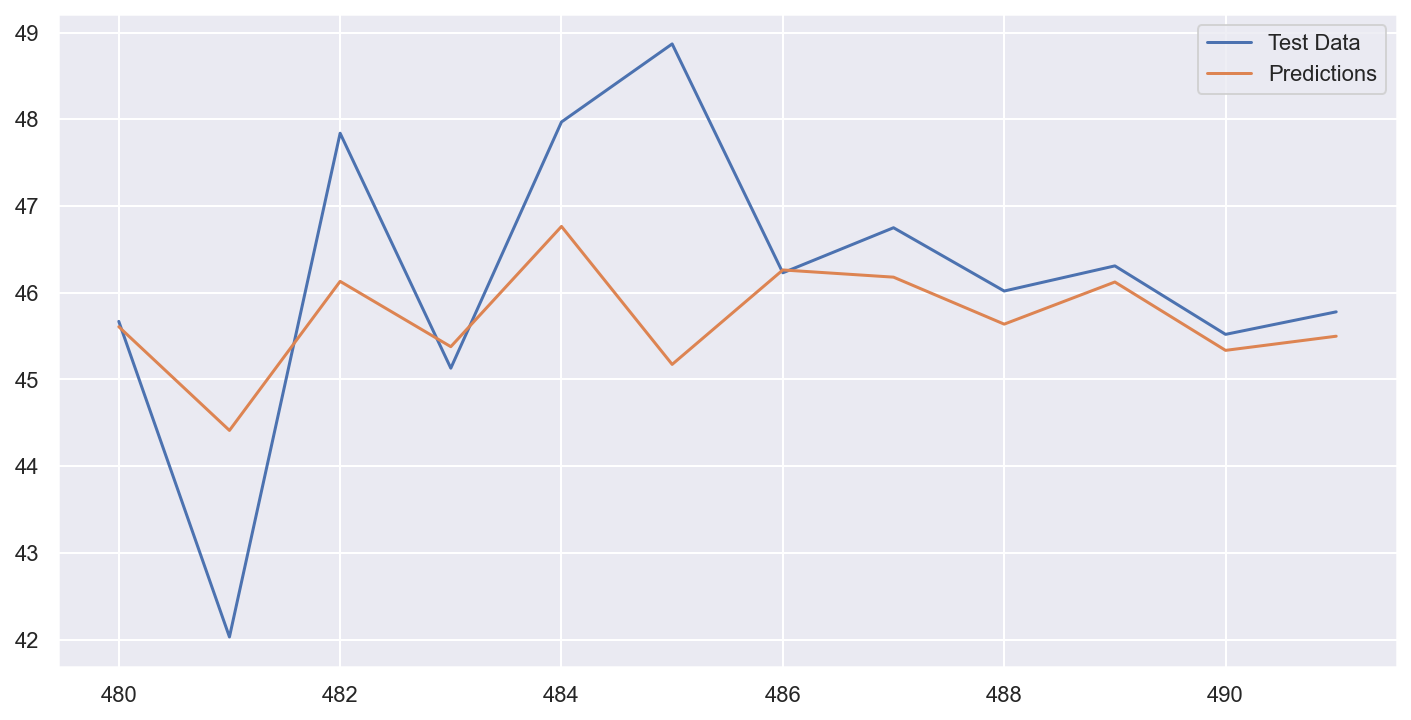

In [131]:
#Plot the graph of the Test Data vs Predictions for the last split
plt.figure(figsize=(12,6))
sns.set(font_scale=1)
plt.plot(test)
plt.plot(predictions)
plt.legend(('Test Data','Predictions'))

In [132]:
#Milk Prices

dfTimeSeries = df_Milk_Monthly_Ireland_77.copy()

#Drop unwanted columns
#dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,3,4,5,6,9]], axis = 1,)

dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0, 1, 2, 3, 5, 7, 8,9,10]], axis = 1,)


#Add dummy values for Hour to the machine learning dataframe
#dfTimeSeries = pd.get_dummies(dfTimeSeries, prefix = ['Month'], columns = ['Month'], drop_first = True)

# X and y are the array variables that store the independent and dependent variables
y = dfTimeSeries['Cream']
X = dfTimeSeries.drop(columns=['Cream'])

# Split the dataset by using train_test_splitting to 25% and 75% for training and a seed of 42
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_Train, y_Train)

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_Train, y_Train)))
print("Test set score: {:.2f}".format(lr.score(X_Test, y_Test)))

Training set score: 0.09
Test set score: 0.17


### Forcasting

In [191]:
# Keeping Year, Month and Butter Produced
dfTimeSeries = df_Milk_Monthly_Ireland_77.copy()
dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,4,5,6,9,10]], axis = 1,)

In [192]:
dfTimeSeries

Year  Butter  Month
0    1977    1.10      1
1    1977    2.60      2
2    1977    5.90      3
3    1977   10.00      4
4    1977   14.80      5
..    ...     ...    ...
545  2022   29.09      6
546  2022   29.26      7
547  2022   28.60      8
548  2022   23.68      9
549  2022   21.57     10

[550 rows x 3 columns]

In [193]:
df = pd.DataFrame({'Year': [2022,2022,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023],'Month': [11,12,1,2,3,4,5,6,7,8,9,10]})

In [194]:
dfTimeSeries = dfTimeSeries.append(df, ignore_index = True)

C:\Users\tonyw\AppData\Local\Temp\ipykernel_2884\327690867.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [195]:
dfTimeSeries.tail(24)

Year  Butter  Month
538  2021   17.79     11
539  2021   12.17     12
540  2022    6.71      1
541  2022   11.62      2
542  2022   24.43      3
543  2022   29.60      4
544  2022   32.01      5
545  2022   29.09      6
546  2022   29.26      7
547  2022   28.60      8
548  2022   23.68      9
549  2022   21.57     10
550  2022     NaN     11
551  2022     NaN     12
552  2023     NaN      1
553  2023     NaN      2
554  2023     NaN      3
555  2023     NaN      4
556  2023     NaN      5
557  2023     NaN      6
558  2023     NaN      7
559  2023     NaN      8
560  2023     NaN      9
561  2023     NaN     10

In [196]:
dfTimeSeries['time'] = dfTimeSeries.index+1
dfTimeSeries['time2'] = dfTimeSeries['time']**2
dfTimeSeries['time3'] = dfTimeSeries['time']**3
dfTimeSeries['m12'] = dfTimeSeries['Month'].astype(str)

In [197]:
dfTimeSeries = pd.get_dummies(dfTimeSeries, prefix=['m12'],columns=['m12'], drop_first=True)

In [198]:
dfTimeSeries = dfTimeSeries.drop(columns=['Year','Month'])

In [199]:
dfTimeSeries.shape

(562, 15)

In [200]:
training = dfTimeSeries.loc[478:537]

validation = dfTimeSeries.loc[538:549]

train_plus_valid = dfTimeSeries.loc[478:549]

forcast = dfTimeSeries.loc[550:561]

In [201]:
training

Butter  time   time2      time3  m12_10  m12_11  m12_12  m12_2  m12_3  \
478   12.49   479  229441  109902239       0       1       0      0      0   
479    8.34   480  230400  110592000       0       0       1      0      0   
480    5.19   481  231361  111284641       0       0       0      0      0   
481    8.54   482  232324  111980168       0       0       0      1      0   
482   20.30   483  233289  112678587       0       0       0      0      1   
483   24.23   484  234256  113379904       0       0       0      0      0   
484   28.25   485  235225  114084125       0       0       0      0      0   
485   27.03   486  236196  114791256       0       0       0      0      0   
486   23.94   487  237169  115501303       0       0       0      0      0   
487   23.31   488  238144  116214272       0       0       0      0      0   
488   18.23   489  239121  116930169       0       0       0      0      0   
489   17.32   490  240100  117649000       1       0       0      0      0   
490   15.92   491  241081  118370771       0       1       0      0      0   
491   11.41   492  242064  119095488       0       0       1      0      0   
492    8.85   493  243049  119823157       0       0       0      0      0   
493    9.45   494  244036  120553784       0       0       0      1      0   
494   20.18   495  245025  121287375       0       0       0      0      1   
495   23.73   496  246016  122023936       0       0       0      0      0   
496   27.50   497  247009  122763473       0       0       0      0      0   
497   25.58   498  248004  123505992       0       0       0      0      0   
498   23.43   499  249001  124251499       0       0       0      0      0   
499   24.56   500  250000  125000000       0       0       0      0      0   
500   22.48   501  251001  125751501       0       0       0      0      0   
501   20.28   502  252004  126506008       1       0       0      0      0   
502   17.88   503  253009  127263527       0       1       0      0      0   
503   13.92   504  254016  128024064       0       0       1      0      0   
504    8.18   505  255025  128787625       0       0       0      0      0   
505   10.60   506  256036  129554216       0       0       0      1      0   
506   22.21   507  257049  130323843       0       0       0      0      1   
507   28.41   508  258064  131096512       0       0       0      0      0   
508   31.04   509  259081  131872229       0       0       0      0      0   
509   28.10   510  260100  132651000       0       0       0      0      0   
510   28.24   511  261121  133432831       0       0       0      0      0   
511   25.46   512  262144  134217728       0       0       0      0      0   
512   22.32   513  263169  135005697       0       0       0      0      0   
513   20.23   514  264196  135796744       1       0       0      0      0   
514   15.04   515  265225  136590875       0       1       0      0      0   
515   11.24   516  266256  137388096       0       0       1      0      0   
516    7.20   517  267289  138188413       0       0       0      0      0   
517   11.24   518  268324  138991832       0       0       0      1      0   
518   22.56   519  269361  139798359       0       0       0      0      1   
519   28.99   520  270400  140608000       0       0       0      0      0   
520   29.81   521  271441  141420761       0       0       0      0      0   
521   30.26   522  272484  142236648       0       0       0      0      0   
522   30.90   523  273529  143055667       0       0       0      0      0   
523   26.16   524  274576  143877824       0       0       0      0      0   
524   24.02   525  275625  144703125       0       0       0      0      0   
525   22.93   526  276676  145531576       1       0       0      0      0   
526   17.64   527  277729  146363183       0       1       0      0      0   
527   13.01   528  278784  147197952       0       0       1      0      0   
528    6.53   529  279841  

In [202]:
forcast

Butter  time   time2      time3  m12_10  m12_11  m12_12  m12_2  m12_3  \
550     NaN   551  303601  167284151       0       1       0      0      0   
551     NaN   552  304704  168196608       0       0       1      0      0   
552     NaN   553  305809  169112377       0       0       0      0      0   
553     NaN   554  306916  170031464       0       0       0      1      0   
554     NaN   555  308025  170953875       0       0       0      0      1   
555     NaN   556  309136  171879616       0       0       0      0      0   
556     NaN   557  310249  172808693       0       0       0      0      0   
557     NaN   558  311364  173741112       0       0       0      0      0   
558     NaN   559  312481  174676879       0       0       0      0      0   
559     NaN   560  313600  175616000       0       0       0      0      0   
560     NaN   561  314721  176558481       0       0       0      0      0   
561     NaN   562  315844  177504328       1       0       0      0      0   

     m12_4  m12_5  m12_6  m12_7  m12_8  m12_9  
550      0      0      0      0      0      0  
551      0      0      0      0      0      0  
552      0      0      0      0      0      0  
553      0      0      0      0      0      0  
554      0      0      0      0      0      0  
555      1      0      0      0      0      0  
556      0      1      0      0      0      0  
557      0      0      1      0      0      0  
558      0      0      0      1      0      0  
559      0      0      0      0      1      0  
560      0      0      0      0      0      1  
561      0      0      0      0      0      0

In [203]:
y_train = training['Butter']
x_train = training.drop(columns=['Butter'])

y_valid = validation['Butter']
x_valid = validation.drop(columns=['Butter'])

y_train_plus_valid = train_plus_valid['Butter']
x_train_plus_valid = train_plus_valid.drop(columns=['Butter'])

x_forcast = forcast.drop(columns=['Butter'])

In [205]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [206]:
X2 = sm.add_constant(x_train)

In [207]:
X2

const  time   time2      time3  m12_10  m12_11  m12_12  m12_2  m12_3  \
478    1.0   479  229441  109902239       0       1       0      0      0   
479    1.0   480  230400  110592000       0       0       1      0      0   
480    1.0   481  231361  111284641       0       0       0      0      0   
481    1.0   482  232324  111980168       0       0       0      1      0   
482    1.0   483  233289  112678587       0       0       0      0      1   
483    1.0   484  234256  113379904       0       0       0      0      0   
484    1.0   485  235225  114084125       0       0       0      0      0   
485    1.0   486  236196  114791256       0       0       0      0      0   
486    1.0   487  237169  115501303       0       0       0      0      0   
487    1.0   488  238144  116214272       0       0       0      0      0   
488    1.0   489  239121  116930169       0       0       0      0      0   
489    1.0   490  240100  117649000       1       0       0      0      0   
490    1.0   491  241081  118370771       0       1       0      0      0   
491    1.0   492  242064  119095488       0       0       1      0      0   
492    1.0   493  243049  119823157       0       0       0      0      0   
493    1.0   494  244036  120553784       0       0       0      1      0   
494    1.0   495  245025  121287375       0       0       0      0      1   
495    1.0   496  246016  122023936       0       0       0      0      0   
496    1.0   497  247009  122763473       0       0       0      0      0   
497    1.0   498  248004  123505992       0       0       0      0      0   
498    1.0   499  249001  124251499       0       0       0      0      0   
499    1.0   500  250000  125000000       0       0       0      0      0   
500    1.0   501  251001  125751501       0       0       0      0      0   
501    1.0   502  252004  126506008       1       0       0      0      0   
502    1.0   503  253009  127263527       0       1       0      0      0   
503    1.0   504  254016  128024064       0       0       1      0      0   
504    1.0   505  255025  128787625       0       0       0      0      0   
505    1.0   506  256036  129554216       0       0       0      1      0   
506    1.0   507  257049  130323843       0       0       0      0      1   
507    1.0   508  258064  131096512       0       0       0      0      0   
508    1.0   509  259081  131872229       0       0       0      0      0   
509    1.0   510  260100  132651000       0       0       0      0      0   
510    1.0   511  261121  133432831       0       0       0      0      0   
511    1.0   512  262144  134217728       0       0       0      0      0   
512    1.0   513  263169  135005697       0       0       0      0      0   
513    1.0   514  264196  135796744       1       0       0      0      0   
514    1.0   515  265225  136590875       0       1       0      0      0   
515    1.0   516  266256  137388096       0       0       1      0      0   
516    1.0   517  267289  138188413       0       0       0      0      0   
517    1.0   518  268324  138991832       0       0       0      1      0   
518    1.0   519  269361  139798359       0       0       0      0      1   
519    1.0   520  270400  140608000       0       0       0      0      0   
520    1.0   521  271441  141420761       0       0       0      0      0   
521    1.0   522  272484  142236648       0       0       0      0      0   
522    1.0   523  273529  143055667       0       0       0      0      0   
523    1.0   524  274576  143877824       0       0       0      0      0   
524    1.0   525  275625  144703125       0       0       0      0      0   
525    1.0   526  276676  145531576       1       0       0      0      0   
526    1.0   527  277729  146363183       0       1       0      0      0   
527    1.0   528  278784  147197952       0       0       1      0      0   
528    1.0   529  279841  148035889       0       0       0      0      0   
5

In [209]:
est = sm.OLS(y_train, X2)
est2 = est.fit()

In [210]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Butter   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     115.2
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.07e-30
Time:                        16:21:57   Log-Likelihood:                -99.590
No. Observations:                  60   AIC:                             229.2
Df Residuals:                      45   BIC:                             260.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5834.1893   6404.345     -0.911      0.367   -1.87e+04    7064.824
time          34.3242     37.827      0.907      0.369     -41.863     110.511
time2         -0.0674      0.074     -0.905      0.370      -0.217       0.083
time3       4.419e-05   4.88e-05      0.906      0.370   -5.41e-05       0.000
m12_10        12.3199      0.948     12.994      0.000      10.410      14.230
m12_11         8.8406      0.930      9.502      0.000       6.967      10.714
m12_12         4.5117      0.930      4.854      0.000       2.640       6.384
m12_2          2.8052      0.929      3.018      0.004       0.933       4.677
m12_3         15.0069      0.930     16.133      0.000      13.133      16.880
m12_4         19.6390      0.931     21.088      0.000      17.763      21.515
m12_5         21.9372      0.933     23.517      0.000      20.058      23.816
m12_6         20.7132      0.935     22.158      0.000      18.830      22.596
m12_7         19.5687      0.937     20.880      0.000      17.681      21.456
m12_8         17.6595      0.940     18.783      0.000      15.766      19.553
m12_9         14.5854      0.944     15.454      0.000      12.684      16.486
==============================================================================
Omnibus:                        0.910   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.938
Skew:                          -0.275   Prob(JB):                        0.626
Kurtosis:                       2.730   Cond. No.                     4.48e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
y_pred = lr.predict(x_valid)

In [213]:
y_pred

array([20.07756051, 15.95554482, 11.65907338, 14.68814618, 27.12276322,
       31.99692451, 34.54663004, 33.58387982, 32.71067384, 31.0830121 ,
       28.3008946 , 26.33832136])

In [214]:
df = pd.DataFrame({'Actual':y_valid, 'Predicted':y_pred})

In [216]:
df.sort_index()

Actual  Predicted
538   17.79  20.077561
539   12.17  15.955545
540    6.71  11.659073
541   11.62  14.688146
542   24.43  27.122763
543   29.60  31.996925
544   32.01  34.546630
545   29.09  33.583880
546   29.26  32.710674
547   28.60  31.083012
548   23.68  28.300895
549   21.57  26.338321

In [222]:
R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))
print(R2)
print(MAE)
print(RMSE)

0.7980401642627215
3.4611186962669245
3.596964623065678


In [224]:
x_train_no_3 = x_train.drop(columns=['time3'])
x_valid_no_3 = x_valid.drop(columns=['time3'])

In [225]:
lr.fit(x_train_no_3 ,y_train)

LinearRegression()

In [232]:
X2 = sm.add_constant(x_train_no_3)
est = sm.OLS(y_train, X2)
est2 = est.fit()

In [233]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Butter   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     124.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.71e-31
Time:                        16:44:41   Log-Likelihood:                -100.13
No. Observations:                  60   AIC:                             228.3
Df Residuals:                      46   BIC:                             257.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.2547    182.568     -0.199      0.843    -403.744     331.235
time           0.0714      0.719      0.099      0.921      -1.375       1.518
time2       2.897e-05      0.001      0.041      0.967      -0.001       0.001
m12_10        12.4639      0.933     13.360      0.000      10.586      14.342
m12_11         8.8052      0.928      9.491      0.000       6.938      10.673
m12_12         4.4946      0.927      4.846      0.000       2.628       6.362
m12_2          2.8213      0.927      3.042      0.004       0.954       4.688
m12_3         15.0386      0.928     16.211      0.000      13.171      16.906
m12_4         19.6858      0.928     21.212      0.000      17.818      21.554
m12_5         21.9990      0.929     23.693      0.000      20.130      23.868
m12_6         20.7901      0.929     22.376      0.000      18.920      22.660
m12_7         19.6611      0.930     21.145      0.000      17.789      21.533
m12_8         17.7681      0.931     19.091      0.000      15.895      19.641
m12_9         14.7110      0.932     15.789      0.000      12.836      16.586
==============================================================================
Omnibus:                        0.374   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.533
Skew:                          -0.145   Prob(JB):                        0.766
Kurtosis:                       2.641   Cond. No.                     2.50e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [234]:
y_pred = lr.predict(x_valid_no_3)

In [235]:
y_pred 

array([19.44223201, 15.23431813, 10.84240425, 13.76649037, 26.08657649,
       30.83666261, 33.25274873, 32.14683485, 31.12092097, 29.33100709,
       26.37709321, 24.23317933])

In [236]:
df = pd.DataFrame({'Actual':y_valid, 'Predicted':y_pred})

In [237]:
df

Actual  Predicted
538   17.79  19.442232
539   12.17  15.234318
540    6.71  10.842404
541   11.62  13.766490
542   24.43  26.086576
543   29.60  30.836663
544   32.01  33.252749
545   29.09  32.146835
546   29.26  31.120921
547   28.60  29.331007
548   23.68  26.377093
549   21.57  24.233179

In [238]:
R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))
print(R2)
print(MAE)
print(RMSE)

0.9124161997781819
2.178372336629604
2.368729968285379


In [239]:
x_train_plus_valid_no_3 = x_train_plus_valid.drop(columns=['time3'])
x_forecast_no_3 = x_forcast.drop(columns=['time3'])

In [240]:
lr.fit(x_train_plus_valid_no_3, y_train_plus_valid)

LinearRegression()

In [241]:
X2 = sm.add_constant(x_train_no_3)
est = sm.OLS(y_train, X2)
est2 = est.fit()

In [242]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Butter   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     124.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.71e-31
Time:                        16:52:22   Log-Likelihood:                -100.13
No. Observations:                  60   AIC:                             228.3
Df Residuals:                      46   BIC:                             257.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.2547    182.568     -0.199      0.843    -403.744     331.235
time           0.0714      0.719      0.099      0.921      -1.375       1.518
time2       2.897e-05      0.001      0.041      0.967      -0.001       0.001
m12_10        12.4639      0.933     13.360      0.000      10.586      14.342
m12_11         8.8052      0.928      9.491      0.000       6.938      10.673
m12_12         4.4946      0.927      4.846      0.000       2.628       6.362
m12_2          2.8213      0.927      3.042      0.004       0.954       4.688
m12_3         15.0386      0.928     16.211      0.000      13.171      16.906
m12_4         19.6858      0.928     21.212      0.000      17.818      21.554
m12_5         21.9990      0.929     23.693      0.000      20.130      23.868
m12_6         20.7901      0.929     22.376      0.000      18.920      22.660
m12_7         19.6611      0.930     21.145      0.000      17.789      21.533
m12_8         17.7681      0.931     19.091      0.000      15.895      19.641
m12_9         14.7110      0.932     15.789      0.000      12.836      16.586
==============================================================================
Omnibus:                        0.374   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.533
Skew:                          -0.145   Prob(JB):                        0.766
Kurtosis:                       2.641   Cond. No.                     2.50e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
y_pred = lr.predict(x_forecast_no_3)

In [244]:
y_pred

array([18.31452793, 13.77684805,  9.1125015 , 12.27315496, 24.58047508,
       29.30612853, 31.62678198, 30.1241021 , 29.20308889, 27.50707568,
       24.13106246, 21.89838259])